# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [52]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

from sklearn.metrics import  roc_curve,auc,make_scorer,confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error,accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.linear_model import Lasso, Ridge, LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold,KFold, GridSearchCV, cross_validate, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler,label_binarize
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz,DecisionTreeRegressor

from IPython.display import Image
from IPython.display import display
from graphviz import Source

import xgboost as xgb
from xgboost import XGBClassifier
import multiprocessing
from xgboost import to_graphviz

from plot_roc import *


In [54]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [55]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [56]:
data.head(15)

ID Subject school sex  age address famsize Pstatus Medu Fedu  \
0   100097     Por     GP   F   16       U     GT3       A    3    4   
1   101021     Por     GP   F   17       U     GT3       T    3    2   
2   102965     Por     GP   M   16       U     LE3       T    1    2   
3   102989     Por     MS   M   17       U     GT3       T    2    3   
4   103131     Por     GP   F   16       U     GT3       T    1    1   
5   103144     Por     GP   M   18       U     LE3       T    3    1   
6   105257     Por     MS   F   18       U     GT3       T    1    1   
7   107639     Por     MS   F   15       R     GT3       T    4    4   
8   107914    Math     GP   F   15       U     LE3       T    3    2   
9   108089     Por     MS   M   16       R     GT3       T    3    4   
10  108254     Por     GP   M   15       U     LE3       T    4    4   
11  108296     Por     GP   M   18       U     LE3       T    3    4   
12  108753    Math     MS   F   18       R     GT3       T    4    4   
13  108825     Por     GP   M   15       U     GT3       T    4    3   
14  114462    Math     GP   F   16       U     LE3       T    2    2   

        Mjob      Fjob      reason guardian  traveltime  studytime  failures  \
0   services     other      course   father           1          1         0   
1      other     other      course   mother           1          2         0   
2     health  services      course   mother           2          1         2   
3      other  services        home   father           2          2         0   
4    at_home     other        home   mother           2          1         0   
5   services  services      course   mother           2          1         0   
6      other     other      course   mother           2          2         0   
7    teacher     other      course   mother           2          1         0   
8   services     other  reputation   mother           1          2         0   
9      other    health       other   mother           3          2         0   
10    health  services      course   father           1          1         0   
11  services     other        home   mother           1          2         0   
12   teacher   at-home  reputation   mother           3          1         0   
13   teacher     other        home   mother           1          2         0   
14   at_home     other      course   mother           1          2         0   

   schoolsup famsup paid activities nursery higher internet romantic  famrel  \
0         no     no   no         no     yes    yes      yes       no     3.0   
1         no     no   no        yes      no    yes      yes       no     5.0   
2         no     no   no         no      no    yes      yes       no     4.0   
3         no     no   no        yes     yes    yes      yes       no     4.0   
4         no    yes   no         no     yes    yes       no      NaN     4.0   
5         no     no   no        yes     yes    yes      yes      yes     3.0   
6         no     no   no        yes     yes    yes       no       no     1.0   
7         no     no   no         no     yes    yes      yes      yes     1.0   
8         no    yes  yes         no     yes    yes      yes       no     4.0   
9         no     no   no         no      no    yes       no       no     3.0   
10        no    yes   no        yes     yes    yes      yes       no     4.0   
11        no     no   no        yes     yes    yes      yes      yes     4.0   
12        no    yes  yes        yes     yes    yes      yes      yes     4.0   
13        no    yes   no        yes     yes    yes      yes       no     4.0   
14        no    yes   no         no     yes    yes       no       no     4.0   

    freetime  goout  Dalc  Walc  health  absences cheating  G1  G2  G3  
0          2      1   1.0   4.0       5        12      NaN  15  13  14  
1          3      4   1.0   3.0       3         2      NaN  17  18  17  
2          4      5   3.0   5.0       5         0      yes   9   8  10  
3

### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [57]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

Признак  \
0           ID   
1      Subject   
2       school   
3          sex   
4          age   
5      address   
6      famsize   
7      Pstatus   
8         Medu   
9         Fedu   
10        Mjob   
11        Fjob   
12      reason   
13    guardian   
14  traveltime   
15   studytime   
16    failures   
17   schoolsup   
18      famsup   
19        paid   
20  activities   
21     nursery   
22      higher   
23    internet   
24    romantic   
25      famrel   
26    freetime   
27       goout   
28        Dalc   
29        Walc   
30      health   
31    absences   
32    cheating   
33          G1   
34          G2   
35          G3   

                                                                                                                                                                              Описание  
0                                                                                                                                                          Уникальный номер наблюдения  
1                                                                                                                             Предмет: 'Math' - математика, 'Por' - португальский язык  
2                                                                                                                           Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira  
3                                                                                                                                           Пол студента: 'F' - женский, 'M' - мужской  
4                                                                                                                                                                     Возраст студента  
5                                                                                                                          Место проживания студента: 'U' - в городе, 'R' - за городом  
6                                                                                                                              Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3  
7                                                                                                                       Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно  
8                                                 Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование  
9                                                   Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование  
10  Работа матери: 'teacher' - связана с преподаванием, 'health'  - связана с здравоохранением, 'services' - администрация и полиция, 'at_home' - домашняя занятость, 'other' - другое  
11    Работа отца: 'teacher' - связана с преподаванием, 'health'  - связана с здравоохранением, 'services' - администрация и полиция, 'at_home' - домашняя занятость, 'other' - другое  
12                                Причина, по которой студент выбрал данную школу: 'home' - рядом с домом, 'reputation' - репутация школы, 'course' - читаемые курсы, 'other' - другое  
13                                                                                                                Опекун студента (student's guardian): 'mother', 'father' или 'other'  
14                                                                             Время в пути от дома до школы: 1 - < 15 мин, 2 - от 15 до 30 мин, 3 - от 30 мин до 1 часа, 4 - > 1 часа  
15                                                                        Количество часов на учебу в неделю: 1 - < 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, 4 - > 10 часов  
16                                                                                                                Число завалов студента по предыдущим курсам:  n если 0<=n<3, иначе 3  
17        

## Часть 1. Предобработка данных

* Разделите данные на две части - данные для моделирования (80%) и отложенную выборку (20%). Убедитесь, что распределение целевой переменной (`G3`) одинаково в обоих частях.  
  __NB__: Отложенную выборку нужно использовать только для финальной оценки качества модели. Обучение и кросс-валидацию следует проводить на данных для моделирования.  
* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

In [58]:
data.drop(["ID"], axis = 1, inplace = True)
for column in data.columns.tolist():
    print(column, "=", data[column].unique())

Subject = ['Por' 'Math']
school = ['GP' 'MS']
sex = ['F' 'M' 'm']
age = [16 17 18 15 19 21 20 22]
address = ['U' 'R']
famsize = ['GT3' 'LE3']
Pstatus = ['A' 'T' 't']
Medu = ['3' '1' '2' '4' '0' 'o']
Fedu = ['4' '2' '3' '1' 'o' '0']
Mjob = ['services' 'other' 'health' 'at_home' 'teacher' 'at-home']
Fjob = ['other' 'services' 'health' 'at-home' 'teacher' 'at_home']
reason = ['course' 'home' 'reputation' 'other']
guardian = ['father' 'mother' 'other' 'futher']
traveltime = [1 2 3 4]
studytime = [1 2 4 3]
failures = [0 2 1 3]
schoolsup = ['no' 'yes']
famsup = ['no' 'yes']
paid = ['no' 'yes']
activities = ['no' 'yes']
nursery = ['yes' 'no']
higher = ['yes' 'no']
internet = ['yes' 'no']
romantic = ['no' nan 'yes']
famrel = [ 3.  5.  4.  1.  2. nan]
freetime = [2 3 4 1 5]
goout = [1 4 5 3 2]
Dalc = [ 1.  3.  4.  2.  5. nan]
Walc = [ 4.  3.  5.  1.  2. nan]
health = [5 3 4 2 1]
absences = [12  2  0  4  6 10  7 20 14 11 24  8 16 21  1 18  5 22  9  3 15 26 25 54
 56 40 19 13 38 30 17 28 32 23 75

Дропиним id, он нам не нужен. Посмотрим,что лежит в столбцах. Столбец sex имеет ошибку как пол m,Pstatus - t,Medu - о,Fedu - о,Mjob - at-home,guardian - futher,  famrel,Dalc,Walc,cheating,romantic -  NaN. Исправим ошибки. Колонку cheating я бы вообще удалила, слишком много пропущенных значений, но наверное лучше оставить

In [59]:
# дропним пусте в колонках medu и fedu,romantic
data.dropna(subset = ['romantic',"famrel","Dalc","Walc"], inplace = True)
# исправим ошибки
data.sex.replace("M", "m", inplace=True)
data.Pstatus.replace("t", "T", inplace=True)
data.replace("at-home", "at_home", inplace=True)
data.guardian.replace("futher", "father", inplace=True)
data.replace("o", "0", inplace=True)
# заменим "неправильные" типы
data['Medu'] = data['Medu'].apply(pd.to_numeric, errors='coerce',downcast='integer')
data['Fedu'] = data['Fedu'].apply(pd.to_numeric, errors='coerce',downcast='integer')
data['famrel'] = data.famrel.astype('int64')
data['Dalc'] = data.Dalc.astype('int64')
data['Walc'] = data.Walc.astype('int64')

# проверка
for column in data.columns.tolist():
    print(column, "=", data[column].unique())

Subject = ['Por' 'Math']
school = ['GP' 'MS']
sex = ['F' 'm']
age = [16 17 18 15 19 21 20 22]
address = ['U' 'R']
famsize = ['GT3' 'LE3']
Pstatus = ['A' 'T']
Medu = [3 1 2 4 0]
Fedu = [4 2 3 1 0]
Mjob = ['services' 'other' 'health' 'teacher' 'at_home']
Fjob = ['other' 'services' 'health' 'at_home' 'teacher']
reason = ['course' 'home' 'reputation' 'other']
guardian = ['father' 'mother' 'other']
traveltime = [1 2 3 4]
studytime = [1 2 4 3]
failures = [0 2 1 3]
schoolsup = ['no' 'yes']
famsup = ['no' 'yes']
paid = ['no' 'yes']
activities = ['no' 'yes']
nursery = ['yes' 'no']
higher = ['yes' 'no']
internet = ['yes' 'no']
romantic = ['no' 'yes']
famrel = [3 5 4 1 2]
freetime = [2 3 4 1 5]
goout = [1 4 5 3 2]
Dalc = [1 3 4 2 5]
Walc = [4 3 5 1 2]
health = [5 3 4 2 1]
absences = [12  2  0  4  6 10  7 20 14 11 24  8 16 21  1 18  5 22  9  3 15 26 25 54
 56 40 13 38 30 17 28 32 23 75]
cheating = [nan 'yes' 'no']
G1 = [15 17  9 14 11 13  7 12 16  6  8 10 18  0  5  3 19  4]
G2 = [13 18  8 15 11 12

In [60]:
abs(data.corr()['G3'])

age           0.117976
Medu          0.207814
Fedu          0.164776
traveltime    0.112519
studytime     0.158775
failures      0.382542
famrel        0.052474
freetime      0.057242
goout         0.092770
Dalc          0.125858
Walc          0.110614
health        0.070054
absences      0.043690
G1            0.807610
G2            0.910560
G3            1.000000
Name: G3, dtype: float64

Можно заметить, G3 очень слабо зависит от признаков: sex, Pstatus, famsup, activities, nursery - по модулю < 0.05
Скорее всего, они не оказывают значительного влияния на итоговую оценку, можно не вкючать их в модели
Также очень слабо ан G3 влияют: goout, health, schoolsup, freetime, famsize, famrel, paid

In [61]:
data = data.drop(["sex","Pstatus","activities", "famsup",   "nursery"], axis=1)
data = data.drop(["freetime","goout", "schoolsup","health",   "famsize", "famrel", "paid"], axis=1)

In [62]:
print(data[data.Fjob == "other"].count())
print(data[data.Mjob == "other"].count())

Subject       557
school        557
age           557
address       557
Medu          557
Fedu          557
Mjob          557
Fjob          557
reason        557
guardian      557
traveltime    557
studytime     557
failures      557
higher        557
internet      557
romantic      557
Dalc          557
Walc          557
absences      557
cheating      181
G1            557
G2            557
G3            557
dtype: int64
Subject       387
school        387
age           387
address       387
Medu          387
Fedu          387
Mjob          387
Fjob          387
reason        387
guardian      387
traveltime    387
studytime     387
failures      387
higher        387
internet      387
romantic      387
Dalc          387
Walc          387
absences      387
cheating      124
G1            387
G2            387
G3            387
dtype: int64


Если посмотреть количество ответов other в признаках "Fjob"и "Mjob", то можно заметить, что их слишком много, что ни о чем не говорит.

Данные параметры можно из модели убрать¶

In [63]:
data = data.drop(["Fjob", "Mjob"], axis=1)

Колонку cheating так же можно обрать, так как в ней слишком много пропусков

In [64]:
data = data.drop(['cheating'], axis=1) 

In [65]:
data.head()

Subject school  age address  Medu  Fedu  reason guardian  traveltime  \
0     Por     GP   16       U     3     4  course   father           1   
1     Por     GP   17       U     3     2  course   mother           1   
2     Por     GP   16       U     1     2  course   mother           2   
3     Por     MS   17       U     2     3    home   father           2   
5     Por     GP   18       U     3     1  course   mother           2   

   studytime  failures higher internet romantic  Dalc  Walc  absences  G1  G2  \
0          1         0    yes      yes       no     1     4        12  15  13   
1          2         0    yes      yes       no     1     3         2  17  18   
2          1         2    yes      yes       no     3     5         0   9   8   
3          2         0    yes      yes       no     1     1         4  14  15   
5          1         0    yes      yes      yes     4     5         2  11  11   

   G3  
0  14  
1  17  
2  10  
3  16  
5  12

 Encoding binary features

In [66]:
#  Encoding binary features
data.replace("no", 0, inplace=True)
data.replace("yes", 1, inplace=True)
# 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1042
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Subject     1004 non-null   object
 1   school      1004 non-null   object
 2   age         1004 non-null   int64 
 3   address     1004 non-null   object
 4   Medu        1004 non-null   int64 
 5   Fedu        1004 non-null   int64 
 6   reason      1004 non-null   object
 7   guardian    1004 non-null   object
 8   traveltime  1004 non-null   int64 
 9   studytime   1004 non-null   int64 
 10  failures    1004 non-null   int64 
 11  higher      1004 non-null   int64 
 12  internet    1004 non-null   int64 
 13  romantic    1004 non-null   int64 
 14  Dalc        1004 non-null   int64 
 15  Walc        1004 non-null   int64 
 16  absences    1004 non-null   int64 
 17  G1          1004 non-null   int64 
 18  G2          1004 non-null   int64 
 19  G3          1004 non-null   int64 
dtypes: int64

In [67]:
# Приведение типов
bin_sex = {"sex": {"M": 1, "m": 1, "F": 0}}
data.replace(bin_sex, inplace=True)

lg_3 = {"famsize": {"LE3": 0, "GT3": 1}}
data.replace(lg_3, inplace=True)

bin_pstat = {"Pstatus": {"A": 0, "T": 1, "t": 1}}
data.replace(bin_pstat, inplace=True)

bin_addr = {"address": {"R": 0, "U": 1}}
data.replace(bin_addr, inplace=True)

bin_sch = {"school": {"GP": 0, "MS": 1}}
data.replace(bin_sch, inplace=True)

bin_sub = {"Subject": {"Por": 0, "Math": 1}}
data.replace(bin_sub, inplace=True)
data.head(15)

Subject  school  age  address  Medu  Fedu      reason guardian  \
0         0       0   16        1     3     4      course   father   
1         0       0   17        1     3     2      course   mother   
2         0       0   16        1     1     2      course   mother   
3         0       1   17        1     2     3        home   father   
5         0       0   18        1     3     1      course   mother   
6         0       1   18        1     1     1      course   mother   
7         0       1   15        0     4     4      course   mother   
8         1       0   15        1     3     2  reputation   mother   
9         0       1   16        0     3     4       other   mother   
10        0       0   15        1     4     4      course   father   
11        0       0   18        1     3     4        home   mother   
12        1       1   18        0     4     4  reputation   mother   
13        0       0   15        1     4     3        home   mother   
14        1       0   16        1     2     2      course   mother   
15        1       0   17        0     1     3      course   father   

    traveltime  studytime  failures  higher  internet  romantic  Dalc  Walc  \
0            1          1         0       1         1         0     1     4   
1            1          2         0       1         1         0     1     3   
2            2          1         2       1         1         0     3     5   
3            2          2         0       1         1         0     1     1   
5            2          1         0       1         1         1     4     5   
6            2          2         0       1         0         0     1     1   
7            2          1         0       1         1         1     3     5   
8            1          2         0       1         1         0     1     1   
9            3          2         0       1         0         0     1     2   
10           1          1         0       1         1         0     1     3   
11           1          2         0       1         1         1     1     3   
12           3          1         0       1         1         1     2     2   
13           1          2         0       1         1         0     2     3   
14           1          2         0       1         0         0     1     2   
15           3          2         1       1         1         0     1     4   

    absences  G1  G2  G3  
0         12  15  13  14  
1          2  17  18  17  
2          0   9   8  10  
3          4  14  15  16  
5          2  11  11  12  
6          6  11  12   9  
7          0  13  14  14  
8         10   7   6   6  
9          4   9  10  11  
10         0  12  13  12  
11         6  16  16  17  
12         7   6   5   6  
13         0  11  11  11  
14         4   8   7   6  
15        20   9   7   8

In [68]:
# First: we create two data sets for numeric and non-numeric data
numerical = data.select_dtypes(exclude=['object'])
categorical = data.select_dtypes(include=['object'])

# Second: One-hot encode the non-numeric columns

onehot = pd.get_dummies(categorical)

# third: Third: Union the one-hot encoded columns to the numeric ones

df = pd.concat([numerical, onehot], axis=1)
df.head()

Subject  school  age  address  Medu  Fedu  traveltime  studytime  failures  \
0        0       0   16        1     3     4           1          1         0   
1        0       0   17        1     3     2           1          2         0   
2        0       0   16        1     1     2           2          1         2   
3        0       1   17        1     2     3           2          2         0   
5        0       0   18        1     3     1           2          1         0   

   higher  internet  romantic  Dalc  Walc  absences  G1  G2  G3  \
0       1         1         0     1     4        12  15  13  14   
1       1         1         0     1     3         2  17  18  17   
2       1         1         0     3     5         0   9   8  10   
3       1         1         0     1     1         4  14  15  16   
5       1         1         1     4     5         2  11  11  12   

   reason_course  reason_home  reason_other  reason_reputation  \
0              1            0             0                  0   
1              1            0             0                  0   
2              1            0             0                  0   
3              0            1             0                  0   
5              1            0             0                  0   

   guardian_father  guardian_mother  guardian_other  
0                1                0               0  
1                0                1               0  
2                0                1               0  
3                1                0               0  
5                0                1               0

Разделим выборки

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(["G2", "G3"], axis=1) # с использованием G1
y = df["G3"]


# приведем к стандартному виду
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(X_train))
print(len(X_test))

803
201


## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* Для решения задачи примените следующие методы:  
  * Линейная регрессия + регуляризации  
  * Полиномиальная регрессия  
  * KNN  
  * Деревья решений, Random Forest  
  
  Для каждого метода выполните настройку гиперпараметров на кросс-валидации.  
<br>    
* Оцените качество каждой модели на отложенной выборке, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

Линейная регрессия

## Решение с признаком G1

In [71]:
def compute_metrics(y_test, y_pred,y_train,y_train_pred):
    print("----------------Test:--------------------")
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('R2:', r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    print("----------------Train:-------------------")
    print('MSE:', mean_squared_error(y_train, y_train_pred))
    print('MAE:', mean_absolute_error(y_train, y_train_pred))
    print('R2:', r2_score(y_train, y_train_pred))
    print('MAPE:', mean_absolute_percentage_error(y_train,y_train_pred))

## RIDGE

In [72]:
skfold = StratifiedKFold(n_splits=5, shuffle=True) 
ridge = Ridge(alpha=0.01, max_iter=100000).fit(X_train, y_train) # Fit the training data to a ridge regression line

print("RIDGE REGRESSION") # Ridge is L2 penalty, which adds “squared magnitude” of coefficient as penalty term to the loss function. Good for avoiding the over-fitting issue
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.2f}".format(np.mean(cross_val_score(ridge, X_train, y_train, cv=skfold,scoring = 'explained_variance'))))

RIDGE REGRESSION
Training set score: 0.69
Test set score: 0.64
Mean Cross-Validation, Kfold: 0.67


----------------Test:--------------------
MSE: 4.992653589787746
MAE: 1.4891900913514222
R2: 0.6415427471228359
MAPE: 1636147026220722.2
----------------Train:-------------------
MSE: 4.7160546463184705
MAE: 1.4600391026698927
R2: 0.6902050056083853
MAPE: 1551440610433420.2
{'alpha': 100.0} 0.6768909195237708


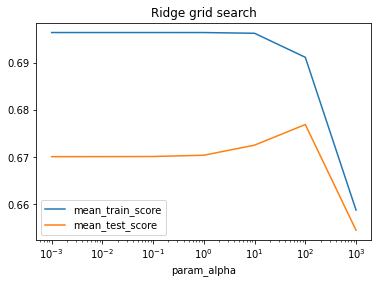

In [73]:
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(Ridge(), param_grid, cv=skfold,scoring = 'explained_variance', return_train_score=True)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_train_pred = grid.predict(X_train)
compute_metrics(y_test, y_pred,y_train, y_train_pred)
res = pd.DataFrame(grid.cv_results_)
res.plot("param_alpha", ["mean_train_score", "mean_test_score"], logx=True)
plt.title("Ridge grid search")
print(grid.best_params_, grid.best_score_)

## Lasso

In [74]:
lasso = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) # Fit the training data to a lasso regression line with alpha = 0.01 and 100,000 iterations

print("LASSO REGRESSION") # LASSO is L1 penalty, which adds “absolute value of magnitude” of coefficient as penalty term to the loss function. Good for feature selection when you have a lot of features.
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.2f}".format(np.mean(cross_val_score(lasso, X_train, y_train, cv=skfold,scoring = 'explained_variance'))))

LASSO REGRESSION
Training set score: 0.69
Test set score: 0.65
Mean Cross-Validation, Kfold: 0.68


In [75]:
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid_lasso = GridSearchCV(Lasso(), param_grid, cv=skfold, scoring = 'explained_variance',return_train_score=True)
grid_lasso.fit(X_train, y_train)
y_pred = grid_lasso.predict(X_test)
y_train_pred = grid_lasso.predict(X_train)

compute_metrics(y_test, y_pred,y_train, y_train_pred)

print(grid_lasso.best_params_, grid_lasso.best_score_)

----------------Test:--------------------
MSE: 4.937388894511945
MAE: 1.5051741063499386
R2: 0.6455105831630086
MAPE: 1584976438278087.2
----------------Train:-------------------
MSE: 4.669820266015007
MAE: 1.4662915473185332
R2: 0.6932421162148098
MAPE: 1501356004567620.8
{'alpha': 0.01} 0.6824019928514228


## LinearRegression

In [76]:
lr = LinearRegression().fit(X_train, y_train) # Fit the training data to a regression line

print("LINEAR REGRESSION")
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.2f}".format(np.mean(cross_val_score(lr, X_train, y_train, cv=skfold,scoring = 'explained_variance'))))


LINEAR REGRESSION
Training set score: 0.69
Test set score: 0.64
Mean Cross-Validation, Kfold: 0.67


----------------Test:--------------------
MSE: 4.967025358922106
MAE: 1.5244568005854036
R2: 0.6433827756902074
MAPE: 1579466960051300.2
----------------Train:-------------------
MSE: 4.662637526020038
MAE: 1.4735057910202138
R2: 0.6937139463913737
MAPE: 1488033560994387.5


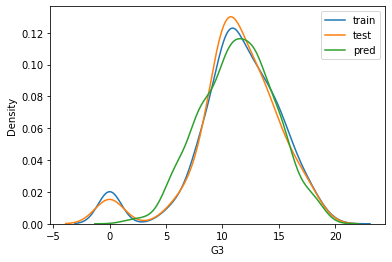

In [77]:

regressionModel = LinearRegression()
regressionModel.fit(X_train, y_train)
predictedDependentVariables = regressionModel.predict(X_train)

compute_metrics(y_test, regressionModel.predict(X_test),y_train,predictedDependentVariables)
sns.kdeplot(y_train, label='train')
sns.kdeplot(y_test, label='test')
sns.kdeplot(predictedDependentVariables, label='pred')
plt.legend()
plt.show()



## Полиномиальная регрессия 
Квадратичная регрессия

Original number of features: 23
Number of features after polynomial transformation: 299
----------------Test:--------------------
MSE: 8.59504969203057
MAE: 2.127001710199005
R2: 0.3829017284015144
MAPE: 1609641261407237.0
----------------Train:-------------------
MSE: 2.6111589339126833
MAE: 1.2241180533935243
R2: 0.8284744287434052
MAPE: 768239591440241.1


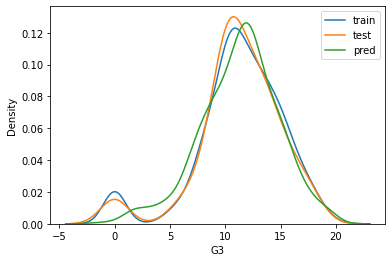

In [78]:

poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)

poly_train = poly.transform(X_train)
poly_test = poly.transform(X_test)

print('Original number of features:', X_train.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

regressionModel = LinearRegression(normalize=True)
regressionModel.fit(poly_train, y_train)

compute_metrics(y_test, regressionModel.predict(poly_test),y_train,regressionModel.predict(poly_train))

sns.kdeplot(y_train, label='train')
sns.kdeplot(y_test, label='test')
sns.kdeplot(regressionModel.predict(poly_train), label='pred')
plt.legend()
plt.show()

Original number of features: 23
Number of features after polynomial transformation: 299
----------------Test:--------------------
MSE: 5.239328158459193
MAE: 1.4919613144132067
R2: 0.6238322677854571
MAPE: 1682043490724185.8
----------------Train:-------------------
MSE: 4.375234338329885
MAE: 1.3987821411448165
R2: 0.712593301190222
MAPE: 1513098347935627.8


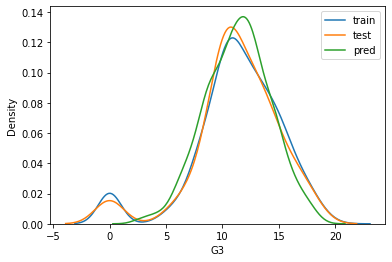

In [79]:

poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)

poly_train = poly.transform(X_train)
poly_test = poly.transform(X_test)

print('Original number of features:', X_train.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

regressionModel = Ridge(normalize=True)
regressionModel.fit(poly_train, y_train)

compute_metrics(y_test, regressionModel.predict(poly_test),y_train,regressionModel.predict(poly_train))

sns.kdeplot(y_train, label='train')
sns.kdeplot(y_test, label='test')
sns.kdeplot(regressionModel.predict(poly_train), label='pred')
plt.legend()
plt.show()

Original number of features: 23
Number of features after polynomial transformation: 2599
----------------Test:--------------------
MSE: 5.215786369496218
MAE: 1.5543292925193233
R2: 0.6255224962076218
MAPE: 1468107808804823.0
----------------Train:-------------------
MSE: 2.8241316082693735
MAE: 1.1679435187404823
R2: 0.8144843727737605
MAPE: 1046357670941525.8


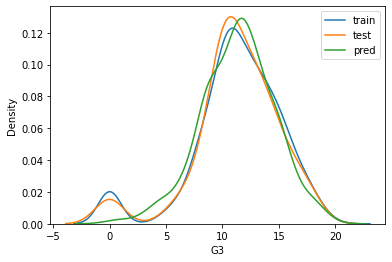

In [80]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train)

poly_train = poly.transform(X_train)
poly_test = poly.transform(X_test)

print('Original number of features:', X_train.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

regressionModel = Ridge(normalize=True)
regressionModel.fit(poly_train, y_train)

compute_metrics(y_test, regressionModel.predict(poly_test),y_train,regressionModel.predict(poly_train))
sns.kdeplot(y_train, label='train')
sns.kdeplot(y_test, label='test')
sns.kdeplot(regressionModel.predict(poly_train), label='pred')
plt.legend()
plt.show()

## KNN

In [81]:
def get_model_quality(test_label, preds):
    print("Accuracy:",
      round(metrics.accuracy_score(test_label, preds), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(test_label, preds), 5))

    print()
    print(metrics.classification_report(test_label, preds))


In [82]:
knn = KNeighborsClassifier().fit(X_train, y_train)

print("KNN CLASSIFER")
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(knn, X_train, y_train, cv=skfold,scoring = 'explained_variance'))))


KNN CLASSIFER
Training set score: 0.50
Test set score: 0.24
Mean Cross Validation, KFold: 0.53


In [83]:
grid = {"n_neighbors":np.arange(1,50)}
knn= KNeighborsClassifier()
scaler = StandardScaler()

knrModel = make_pipeline(
    scaler, 
    knn
)
knn_cv = GridSearchCV(knrModel, grid,cv=skfold)  # GridSearchCV
knn_cv.fit(X_train, y_train)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter K: ",knn_cv.best_params_)
print(knn_cv.best_score_)
best = knn_cv.best_estimator_

y_pred = best.predict(X_test)

get_model_quality(y_test, y_pred)

tuned hyperparameter K:  {'n_neighbors': 36}
0.30004658385093164
Accuracy: 0.28856 
Balanced accuracy: 0.19693

              precision    recall  f1-score   support

           0       0.50      0.60      0.55        10
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         3
           8       0.23      0.33      0.27         9
           9       0.33      0.08      0.13        12
          10       0.41      0.51      0.45        39
          11       0.26      0.41      0.32        29
          12       0.25      0.16      0.19        19
          13       0.23      0.27      0.25        22
          14       0.29      0.11      0.15        19
          15       0.15      0.36      0.22        11
          16       0.25      0.11      0.15         9
          17       0.00      0.00      0.00         7
          18       0.00      0.00      0.00         6

    accuracy          

In [84]:
knn = KNeighborsRegressor().fit(X_train, y_train)

print("KNN Regressor")
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(knn, X_train, y_train, cv=skfold,scoring = 'explained_variance'))))

KNN Regressor
Training set score: 0.79
Test set score: 0.62
Mean Cross Validation, KFold: 0.69


In [85]:

params = {
    'kneighborsregressor__n_neighbors': [1,2,3,4,5,6,7,8,9,10,15,20,50,100]
}

kf = KFold(n_splits=10, shuffle=True)
knn = KNeighborsRegressor()
scaler = StandardScaler()

knrModel = make_pipeline(
    scaler, 
    knn
)

gd = GridSearchCV(knrModel, params, cv=kf, scoring = 'explained_variance')

gd.fit(X_train, y_train)

print(gd.best_params_,gd.best_score_)


{'kneighborsregressor__n_neighbors': 15} 0.4492560946080495


----------------Test:--------------------
MSE: 9.179303482587065
MAE: 2.0729684908789383
R2: 0.3409540937460015
MAPE: 2197278624166500.5
----------------Train:-------------------
MSE: 7.396784281167842
MAE: 1.878455790784558
R2: 0.5141093738832743
MAPE: 1966328803681314.8


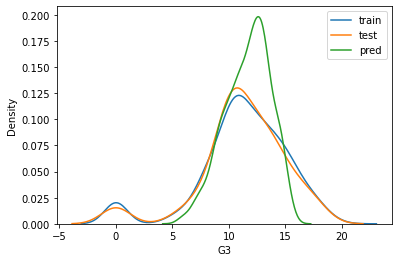

In [86]:
best = gd.best_estimator_

# best.fit(X_train_scaled, y_train)
y_pred = best.predict(X_test)
y_pred_train = best.predict(X_train)

compute_metrics(y_test, y_pred,y_train, y_pred_train)
sns.kdeplot(y_train, label='train')
sns.kdeplot(y_test, label='test')
sns.kdeplot(y_pred_train, label='pred')
plt.legend()
plt.show()

## Random Forest

In [87]:
rf = RandomForestClassifier().fit(X_train, y_train)

print("KNN Regressor")
print("Training set score: {:.2f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(rf, X_train, y_train, cv=skfold))))

KNN Regressor
Training set score: 1.00
Test set score: 0.25
Mean Cross Validation, KFold: 0.27


In [88]:

param = {'n_estimators': range(50, 101, 25), 'max_depth': [30], 'min_samples_split': range(2, 11, 2)}
grid = RandomizedSearchCV(RandomForestClassifier(criterion='entropy'), param, n_iter=20, cv=skfold,scoring = 'explained_variance', verbose=4)
grid.fit(X_train, y_train)
best = grid.best_estimator_
y_pred = best.predict(X_test)
get_model_quality(y_test, y_pred)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END max_depth=30, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV 2/5] END max_depth=30, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV 3/5] END max_depth=30, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV 4/5] END max_depth=30, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV 5/5] END max_depth=30, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV 1/5] END max_depth=30, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV 2/5] END max_depth=30, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV 3/5] END max_depth=30, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV 4/5] END max_depth=30, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV 5/5] END max_depth=30, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV 1/5] END max_depth=30, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV 2/5] END m

In [89]:

rf = RandomForestRegressor().fit(X_train, y_train)

print("Random Forest Regressor")
print("Training set score: {:.2f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(rf, X_train, y_train, cv=skfold,scoring = 'explained_variance'))))

Random Forest Regressor
Training set score: 0.96
Test set score: 0.66
Mean Cross Validation, KFold: 0.76


In [90]:
params_rf = {
  'n_estimators': [50, 100, 200,300, 400, 500],
  'max_depth': [4, 6, 8],
  'min_samples_leaf': [.1, .2],
  'max_features': ['log2', 'sqrt']
}

# Instantiate a random forests regressor 'rf'
rf = RandomForestRegressor(random_state = 17)
grid_rf = GridSearchCV(estimator=rf, param_grid = params_rf, cv = skfold, scoring='explained_variance', n_jobs = -1)

grid_rf.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_df'...
best_hyperparams = grid_rf.best_params_
print('Best hyperparameters:\n', best_hyperparams)


Best hyperparameters:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 50}


In [94]:
# Extract best model from 'grid_rf'
print(grid_rf.best_score_)
best_model = grid_rf.best_estimator_

# Predict the test set labels...
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

compute_metrics(y_test, y_pred,y_train, y_train_pred)

0.37336849586164045
----------------Test:--------------------
MSE: 9.16916458024789
MAE: 2.0045770637014955
R2: 0.34168203591429547
MAPE: 2191400182294278.8
----------------Train:-------------------
MSE: 9.255510901170874
MAE: 2.074803425462692
R2: 0.392010660869231
MAPE: 2198697918647848.2


## Деревья решений

In [95]:

params_dt = {
  'max_depth': [3, 4, 5, 6],
  'min_samples_leaf': [.04, .06, .08],
  'max_features': [.2, .4, .6, .8]
}
SEED = 1

# Instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(random_state=SEED)

grid_dt= GridSearchCV(estimator=dt, param_grid = params_dt, cv = skfold, n_jobs=-1)

# Fitting the grid_dt...
grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters:\n' , best_hyperparams)

# Extract best CV score from 'gird_dt'
best_score = grid_dt.best_score_
print('Best '.format(best_score))

# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

y_pred = best_model.predict(X_test)
get_model_quality(y_test, y_pred)

Best hyperparameters:
 {'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.04}
Best 
Accuracy: 0.32836 
Balanced accuracy: 0.23301

              precision    recall  f1-score   support

           0       0.54      0.70      0.61        10
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         3
           8       0.13      0.22      0.17         9
           9       0.00      0.00      0.00        12
          10       0.40      0.54      0.46        39
          11       0.33      0.55      0.42        29
          12       0.00      0.00      0.00        19
          13       0.33      0.59      0.43        22
          14       0.00      0.00      0.00        19
          15       0.15      0.27      0.19        11
          16       0.00      0.00      0.00         9
          17       0.20      0.29      0.24         7
          18       0.50      0.33      0.40      

In [96]:

bag = BaggingClassifier(n_estimators=30, base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5))
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
get_model_quality(y_test, y_pred)

Accuracy: 0.34826 
Balanced accuracy: 0.28287

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         3
           8       0.26      0.56      0.36         9
           9       0.00      0.00      0.00        12
          10       0.46      0.59      0.52        39
          11       0.26      0.31      0.29        29
          12       0.26      0.26      0.26        19
          13       0.62      0.45      0.53        22
          14       0.00      0.00      0.00        19
          15       0.20      0.64      0.30        11
          16       0.00      0.00      0.00         9
          17       0.00      0.00      0.00         7
          18       0.50      0.83      0.62         6

    accuracy                           0.35       201
   macro avg       0.21      0.28

Лучше всех справлется регрессия с поставленной задчей, результат по R2: 0.64. Лучшие результаты достигаются в Lasso и Ridge, но но такой результат всё равно является недостаточно хорошим. Полиномиальная регресия с повышением степени полинома начинает подстраиваться под данные. 

## Решение задачи регрессии без включения признака G1
Здесь рассматриваются отдельно оценка по математике и по португальскому

In [97]:
df.head()
X2 = df.drop(["G2", "G1"], axis=1) # без G1
X_m = X2[X2["Subject"] == 1].drop("G3", axis=1)
X_p = X2[X2["Subject"] == 0].drop("G3", axis=1)
y_m = X2[X2["Subject"] == 1]["G3"]
y_p = X2[X2["Subject"] == 0]["G3"]
X2.head()

Subject  school  age  address  Medu  Fedu  traveltime  studytime  failures  \
0        0       0   16        1     3     4           1          1         0   
1        0       0   17        1     3     2           1          2         0   
2        0       0   16        1     1     2           2          1         2   
3        0       1   17        1     2     3           2          2         0   
5        0       0   18        1     3     1           2          1         0   

   higher  internet  romantic  Dalc  Walc  absences  G3  reason_course  \
0       1         1         0     1     4        12  14              1   
1       1         1         0     1     3         2  17              1   
2       1         1         0     3     5         0  10              1   
3       1         1         0     1     1         4  16              0   
5       1         1         1     4     5         2  12              1   

   reason_home  reason_other  reason_reputation  guardian_father  \
0            0             0                  0                1   
1            0             0                  0                0   
2            0             0                  0                0   
3            1             0                  0                1   
5            0             0                  0                0   

   guardian_mother  guardian_other  
0                0               0  
1                1               0  
2                1               0  
3                0               0  
5                1               0

In [98]:
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.2)
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2)

## Ridge

In [99]:
print("Math",cross_val_score(Ridge(), X_m, y_m, cv=10))
print("Por",cross_val_score(Ridge(), X_p, y_p, cv=10))

Math [-0.05636467  0.1872715   0.22098065 -0.08950093  0.08281533 -0.02035863
 -0.04677416  0.19364502  0.09370284  0.07237146]
Por [ 0.35814024 -0.0361958   0.14633408  0.21896459  0.27049009  0.30473105
  0.37611765  0.27625287  0.26320009  0.41784265]


In [100]:
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)


grid.fit(x_train_p, y_train_p)
y_pred = grid.predict(x_test_p)
y_train_pred = grid.predict(x_train_p)
print("Por:")
compute_metrics(y_test_p, y_pred,y_train_p, y_train_pred)

grid.fit(x_train_m, y_train_m)
y_pred = grid.predict(x_test_m)
y_train_pred = grid.predict(x_train_m)
print("Math:")
compute_metrics(y_test_m, y_pred,y_train_m, y_train_pred)

Por:
----------------Test:--------------------
MSE: 7.203216342200383
MAE: 2.0678571452030874
R2: 0.2466515706366732
MAPE: 664596166622078.2
----------------Train:-------------------
MSE: 6.876191401628238
MAE: 1.8958937066352364
R2: 0.33328042634574817
MAPE: 943204842295834.4
Math:
----------------Test:--------------------
MSE: 19.316615482475395
MAE: 3.346952374475083
R2: 0.12315199243354935
MAPE: 5377287582782049.0
----------------Train:-------------------
MSE: 17.627330956863496
MAE: 3.21522922632725
R2: 0.1624361664294769
MAPE: 3839764676267720.5


## Lasso

In [101]:
print("Math",cross_val_score(Lasso(), X_m, y_m, cv=10))
print("Por",cross_val_score(Lasso(), X_p, y_p, cv=10))

Math [-0.07542398  0.03269681  0.06066383 -0.06717125 -0.04352652  0.03260639
 -0.00751831  0.0039264   0.08917887  0.01414054]
Por [-0.00478109 -0.01120731 -0.01396083 -0.01522679  0.00144538 -0.01031723
  0.00639734  0.00348584 -0.01626244 -0.04074803]


In [102]:
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid  = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
grid.fit(x_train_p, y_train_p)
y_pred = grid.predict(x_test_p)
y_train_pred = grid.predict(x_train_p)
print("Por:")
compute_metrics(y_test_p, y_pred,y_train_p, y_train_pred)

grid.fit(x_train_m, y_train_m)
y_pred = grid.predict(x_test_m)
y_train_pred = grid.predict(x_train_m)
print("Math:")
compute_metrics(y_test_m, y_pred,y_train_m, y_train_pred)

Por:
----------------Test:--------------------
MSE: 7.21275606793932
MAE: 2.0652924763932474
R2: 0.24565385835641285
MAPE: 664699469859976.8
----------------Train:-------------------
MSE: 6.871991280142675
MAE: 1.8981990844362042
R2: 0.3336876726020823
MAPE: 938445825484363.8
Math:
----------------Test:--------------------
MSE: 18.99295211085449
MAE: 3.3419196441491104
R2: 0.1378441926683941
MAPE: 5245175852406887.0
----------------Train:-------------------
MSE: 17.427854622294053
MAE: 3.214937860781238
R2: 0.17191429808182013
MAPE: 3734001874458696.0


## LinearRegression

In [103]:
print("Math",cross_val_score(LinearRegression(), X_m, y_m, cv=10))
print("Por",cross_val_score(LinearRegression(), X_p, y_p, cv=10))

Math [-0.06049171  0.1845358   0.22128403 -0.08900579  0.08267574 -0.02840901
 -0.04900783  0.19352002  0.0911179   0.07181223]
Por [ 0.3576577  -0.03780882  0.14651572  0.21870755  0.26994016  0.30385042
  0.3761543   0.27546982  0.26086479  0.41935673]


In [104]:
regressionModel = LinearRegression()
regressionModel.fit(x_train_p, y_train_p)
y_pred = regressionModel.predict(x_test_p)
y_train_pred = regressionModel.predict(x_train_p)
print("Por:")
compute_metrics(y_test_p, y_pred,y_train_p, y_train_pred)

regressionModel.fit(x_train_m, y_train_m)
y_pred = regressionModel.predict(x_test_m)
y_train_pred = regressionModel.predict(x_train_m)
print("Math:")
compute_metrics(y_test_m, y_pred,y_train_m, y_train_pred)

Por:
----------------Test:--------------------
MSE: 7.210802838779373
MAE: 2.0657038987569383
R2: 0.24585813684117974
MAPE: 657486539843365.4
----------------Train:-------------------
MSE: 6.866961476063385
MAE: 1.9000416157099111
R2: 0.33417536537202386
MAPE: 931717965854455.2
Math:
----------------Test:--------------------
MSE: 20.28172224311752
MAE: 3.5068905596032516
R2: 0.07934245753207014
MAPE: 4895029085740132.0
----------------Train:-------------------
MSE: 16.85728767408312
MAE: 3.185878156133972
R2: 0.19902482557016388
MAPE: 3466073655345143.5


## KNeighborsRegressor

In [105]:
print("Math",cross_val_score(KNeighborsRegressor(), X_m, y_m, cv=10))
print("Por",cross_val_score(KNeighborsRegressor(), X_p, y_p, cv=10))

Math [-0.50458986  0.02062121  0.15909095 -0.50876131  0.1619075   0.28329584
  0.02275469  0.20255185  0.01251673  0.30621305]
Por [ 0.25718598 -0.16393096  0.04404967  0.14079279  0.20276609  0.09266184
  0.10763934  0.08406916  0.18824149  0.33526696]


In [106]:
parameters = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric': ['manhattan', 'minkowski', 'euclidean'], 'n_neighbors': range(3, 9)}
estimator = KNeighborsRegressor()
model = GridSearchCV(estimator, parameters, cv=10, n_jobs = -1)
model.fit(x_train_p, y_train_p)
print("por")
print(model.best_score_)
model.fit(x_train_m, y_train_m)
print("MAth")
print(model.best_score_)

por
0.13612102465883952
MAth
0.0975868606392257


## Decision Tree

In [109]:
print("Math",cross_val_score(DecisionTreeRegressor(random_state=17), X_m, y_m, cv=10))
print("Por",cross_val_score(DecisionTreeRegressor(random_state=17), X_p, y_p, cv=10))

Math [-0.91313364 -0.2765179  -0.49042987 -0.59214799 -0.64373763 -0.25613692
 -0.83140531 -0.73109351 -1.53040522  0.19437308]
Por [-0.1384507  -0.2387125  -0.85450233 -0.50962554 -0.18523644 -0.98876535
 -0.05517952 -0.26825185 -0.0869195  -0.10773145]


In [110]:
parameters = {'max_depth': range(2, 6)}
tree = DecisionTreeRegressor(random_state=17)
model = GridSearchCV(tree, parameters, cv=10, n_jobs = -1)
model.fit(x_train_p, y_train_p)
print("por")
print(model.best_score_)
model.fit(x_train_m, y_train_m)
print("MAth")
print(model.best_score_)

por
0.2069238578840567
MAth
0.11418318200530261


Без признака G1 результаты получаются очень плохими, точность очень низкая, в некоторых моделях предсказание получается хуже константного - коэффициент детерминации отрицательный

## Часть 3. Бинарная классификация

Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  


### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

In [111]:
df.head()

Subject  school  age  address  Medu  Fedu  traveltime  studytime  failures  \
0        0       0   16        1     3     4           1          1         0   
1        0       0   17        1     3     2           1          2         0   
2        0       0   16        1     1     2           2          1         2   
3        0       1   17        1     2     3           2          2         0   
5        0       0   18        1     3     1           2          1         0   

   higher  internet  romantic  Dalc  Walc  absences  G1  G2  G3  \
0       1         1         0     1     4        12  15  13  14   
1       1         1         0     1     3         2  17  18  17   
2       1         1         0     3     5         0   9   8  10   
3       1         1         0     1     1         4  14  15  16   
5       1         1         1     4     5         2  11  11  12   

   reason_course  reason_home  reason_other  reason_reputation  \
0              1            0             0                  0   
1              1            0             0                  0   
2              1            0             0                  0   
3              0            1             0                  0   
5              1            0             0                  0   

   guardian_father  guardian_mother  guardian_other  
0                1                0               0  
1                0                1               0  
2                0                1               0  
3                1                0               0  
5                0                1               0

In [112]:
bin_df = df.copy()
for index, row in bin_df.iterrows():
    if (bin_df.at[index, 'G3'] < 8):
        bin_df.at[index, 'G3'] = 0
    else:
        bin_df.at[index, 'G3'] = 1

bin_df.head() 

Subject  school  age  address  Medu  Fedu  traveltime  studytime  failures  \
0        0       0   16        1     3     4           1          1         0   
1        0       0   17        1     3     2           1          2         0   
2        0       0   16        1     1     2           2          1         2   
3        0       1   17        1     2     3           2          2         0   
5        0       0   18        1     3     1           2          1         0   

   higher  internet  romantic  Dalc  Walc  absences  G1  G2  G3  \
0       1         1         0     1     4        12  15  13   1   
1       1         1         0     1     3         2  17  18   1   
2       1         1         0     3     5         0   9   8   1   
3       1         1         0     1     1         4  14  15   1   
5       1         1         1     4     5         2  11  11   1   

   reason_course  reason_home  reason_other  reason_reputation  \
0              1            0             0                  0   
1              1            0             0                  0   
2              1            0             0                  0   
3              0            1             0                  0   
5              1            0             0                  0   

   guardian_father  guardian_mother  guardian_other  
0                1                0               0  
1                0                1               0  
2                0                1               0  
3                1                0               0  
5                0                1               0

In [113]:
X = bin_df.drop(["G1", "G2", "G3"], axis = 1)
y =bin_df["G3"]
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 17, stratify=y)
X.head()

Subject  school  age  address  Medu  Fedu  traveltime  studytime  failures  \
0        0       0   16        1     3     4           1          1         0   
1        0       0   17        1     3     2           1          2         0   
2        0       0   16        1     1     2           2          1         2   
3        0       1   17        1     2     3           2          2         0   
5        0       0   18        1     3     1           2          1         0   

   higher  internet  romantic  Dalc  Walc  absences  reason_course  \
0       1         1         0     1     4        12              1   
1       1         1         0     1     3         2              1   
2       1         1         0     3     5         0              1   
3       1         1         0     1     1         4              0   
5       1         1         1     4     5         2              1   

   reason_home  reason_other  reason_reputation  guardian_father  \
0            0             0                  0                1   
1            0             0                  0                0   
2            0             0                  0                0   
3            1             0                  0                1   
5            0             0                  0                0   

   guardian_mother  guardian_other  
0                0               0  
1                1               0  
2                1               0  
3                0               0  
5                1               0

In [114]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.902864
0    0.097136
Name: G3, dtype: float64
1    0.900498
0    0.099502
Name: G3, dtype: float64


In [122]:

cvs = cross_val_score(DecisionTreeClassifier(random_state=17), X, y, cv=5)
print(cvs)
print("\n\n", cvs.mean())

[0.87064677 0.86567164 0.82089552 0.86069652 0.825     ]


 0.8485820895522389


In [121]:
model = DecisionTreeClassifier(max_depth = 5, random_state=17).fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_proba[:, 1]))
model

0.6640883977900554


DecisionTreeClassifier(max_depth=5, random_state=17)

Best hyperparameters:
 {'max_depth': 5, 'max_features': 0.8, 'min_samples_leaf': 0.04}
Best  0.907833850931677


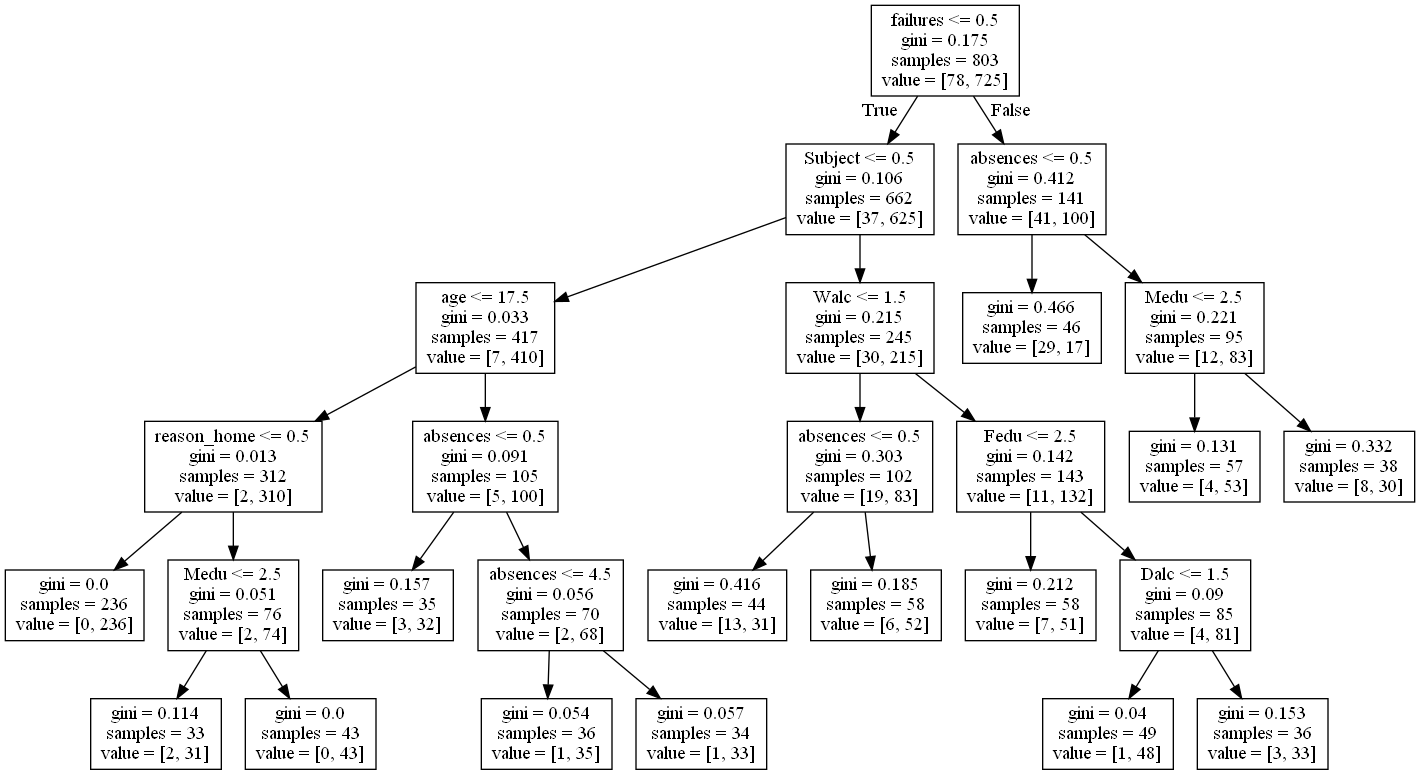

In [131]:
params_dt = {
  'max_depth': [5],
  'min_samples_leaf': [.04, .06, .08],
  'max_features': [.2, .4, .6, .8]
}
SEED = 1

dt = DecisionTreeClassifier(random_state=SEED)

grid_dt= GridSearchCV(estimator=dt, param_grid = params_dt, cv = 5, n_jobs=-1)

# Fitting the grid_dt...
grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters:\n' , best_hyperparams)

# Extract best CV score from 'gird_dt'
best_score = grid_dt.best_score_
print('Best ',(best_score))

# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

graph = Source(export_graphviz(best_model, out_file=None, feature_names=feature_names))
png = graph.pipe(format='png')
Image(png)

Описание работы алгоритма дерева:

Правило1 - деление по наличию предыдущих провалов экзаменов
Правило2 - у тех, кто проваливал - по предмету  ; для не проваливавших - по пропускам
Правило3:

Провалы <1 - изучают математику - по дозе алкоголя
Провалы <1 - изучают португальский  - по пропускам
Провалов >0 - пропуски есть - достигли листа
Провалов >0 - прпусков нет - по образованию матери

### Задание 2  
  
На кросс-валидации (5-fold из 2 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

0.8536119402985074
Train: 0.9925280199252802
Test: 0.9800995024875622


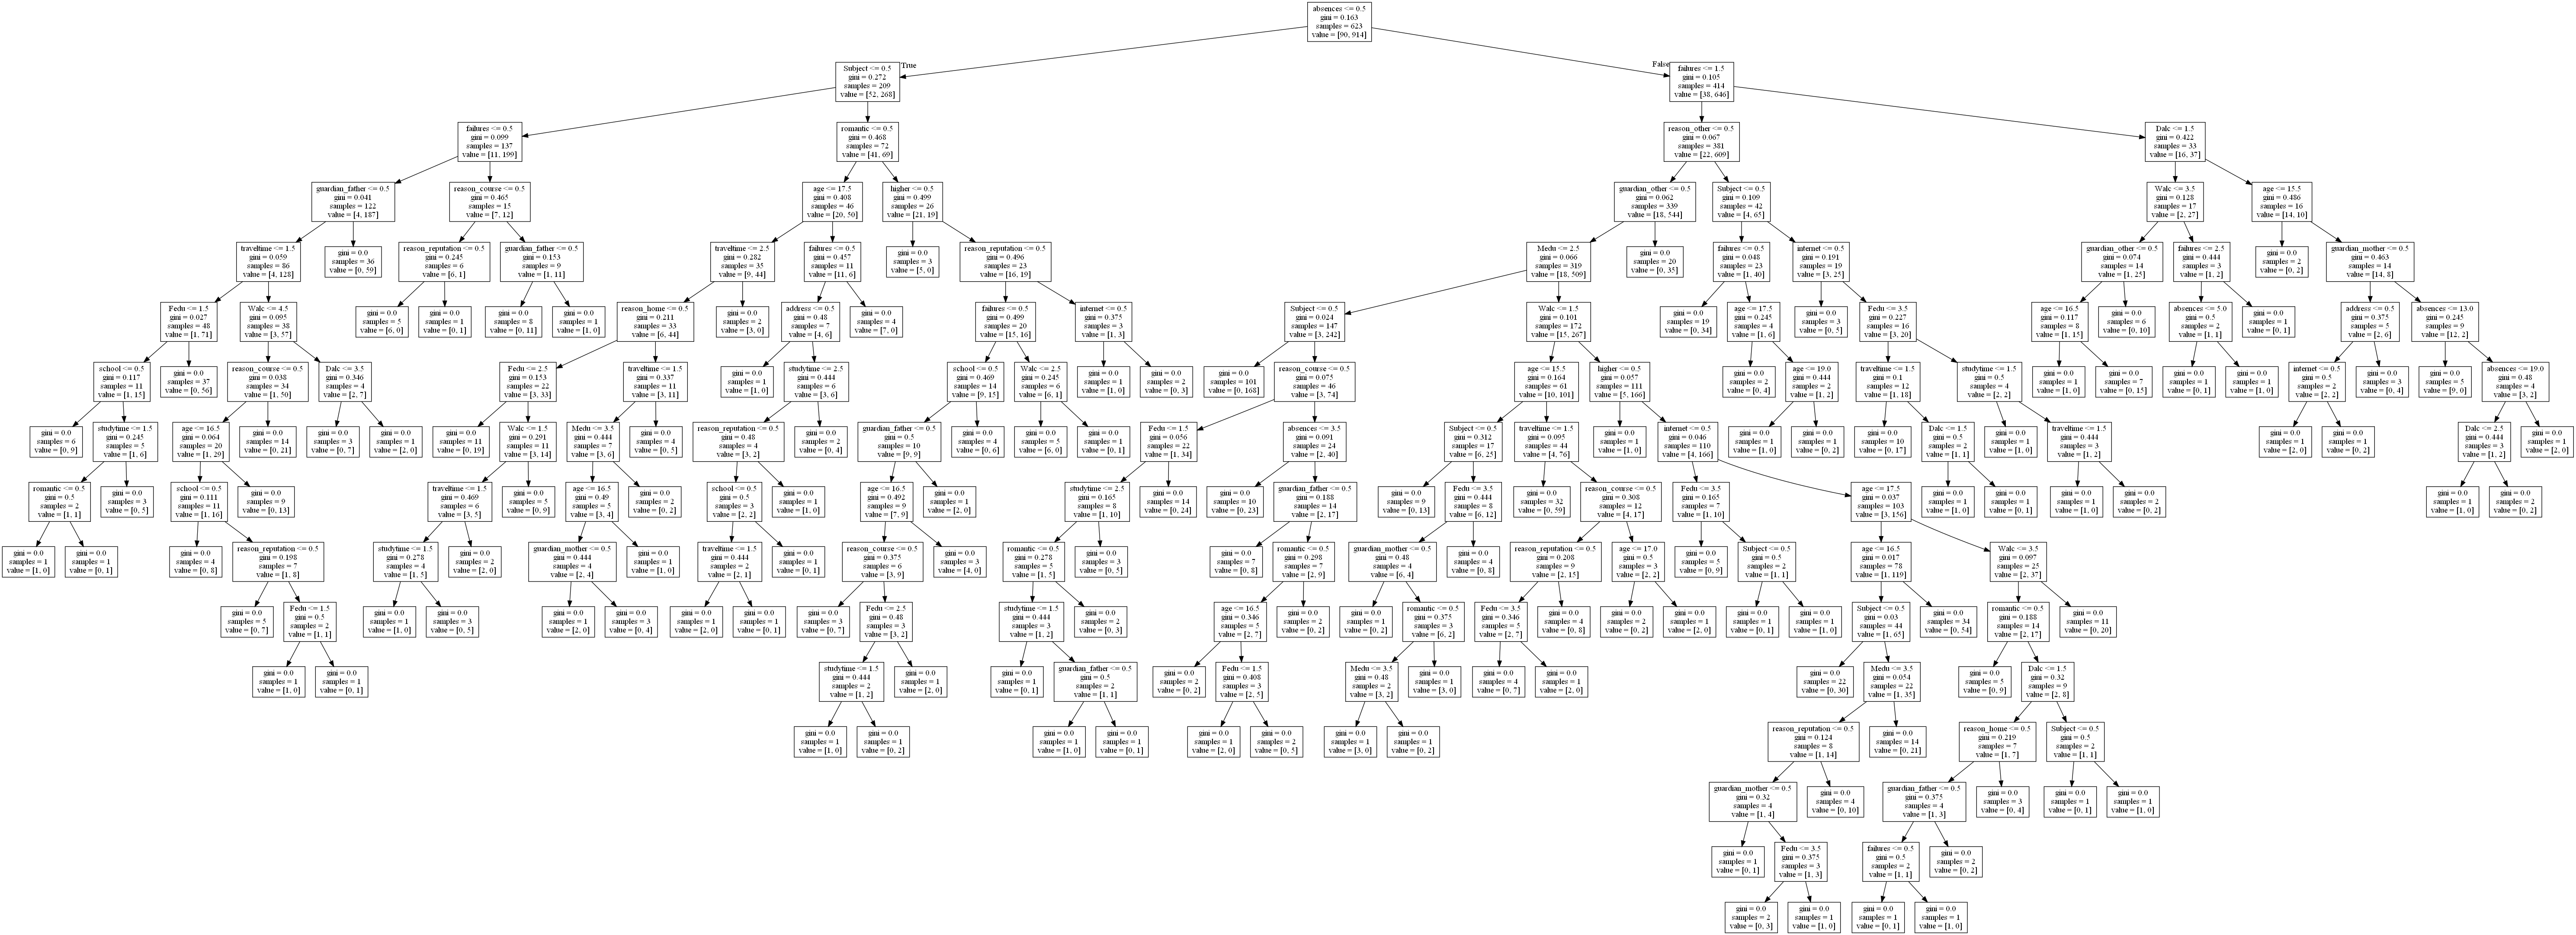

0.817731343283582
Train: 0.9427148194271482
Test: 0.9502487562189055


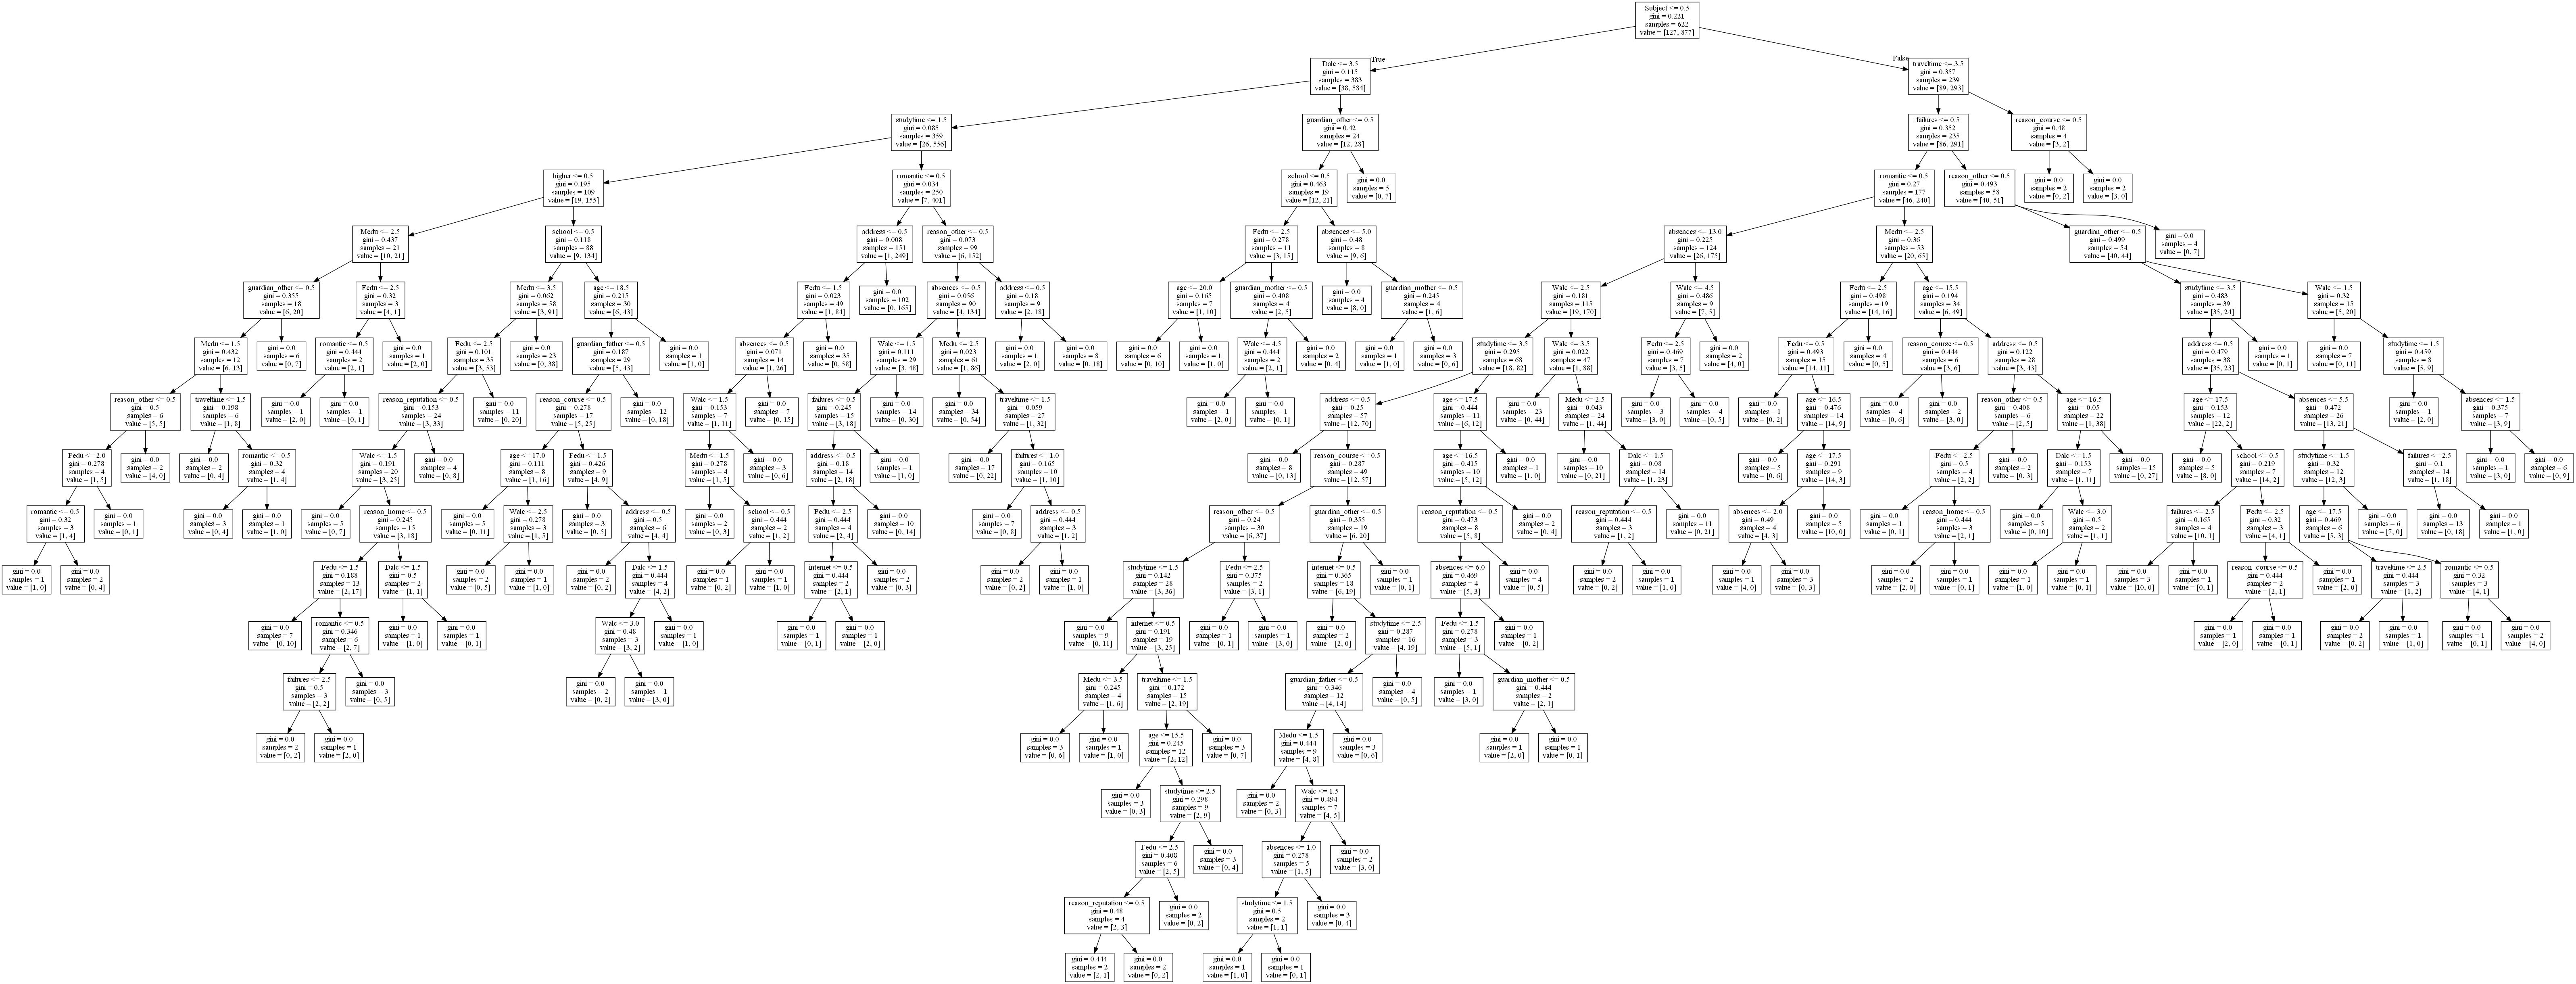

0.8764825870646767
Train: 0.925280199252802
Test: 0.8805970149253731


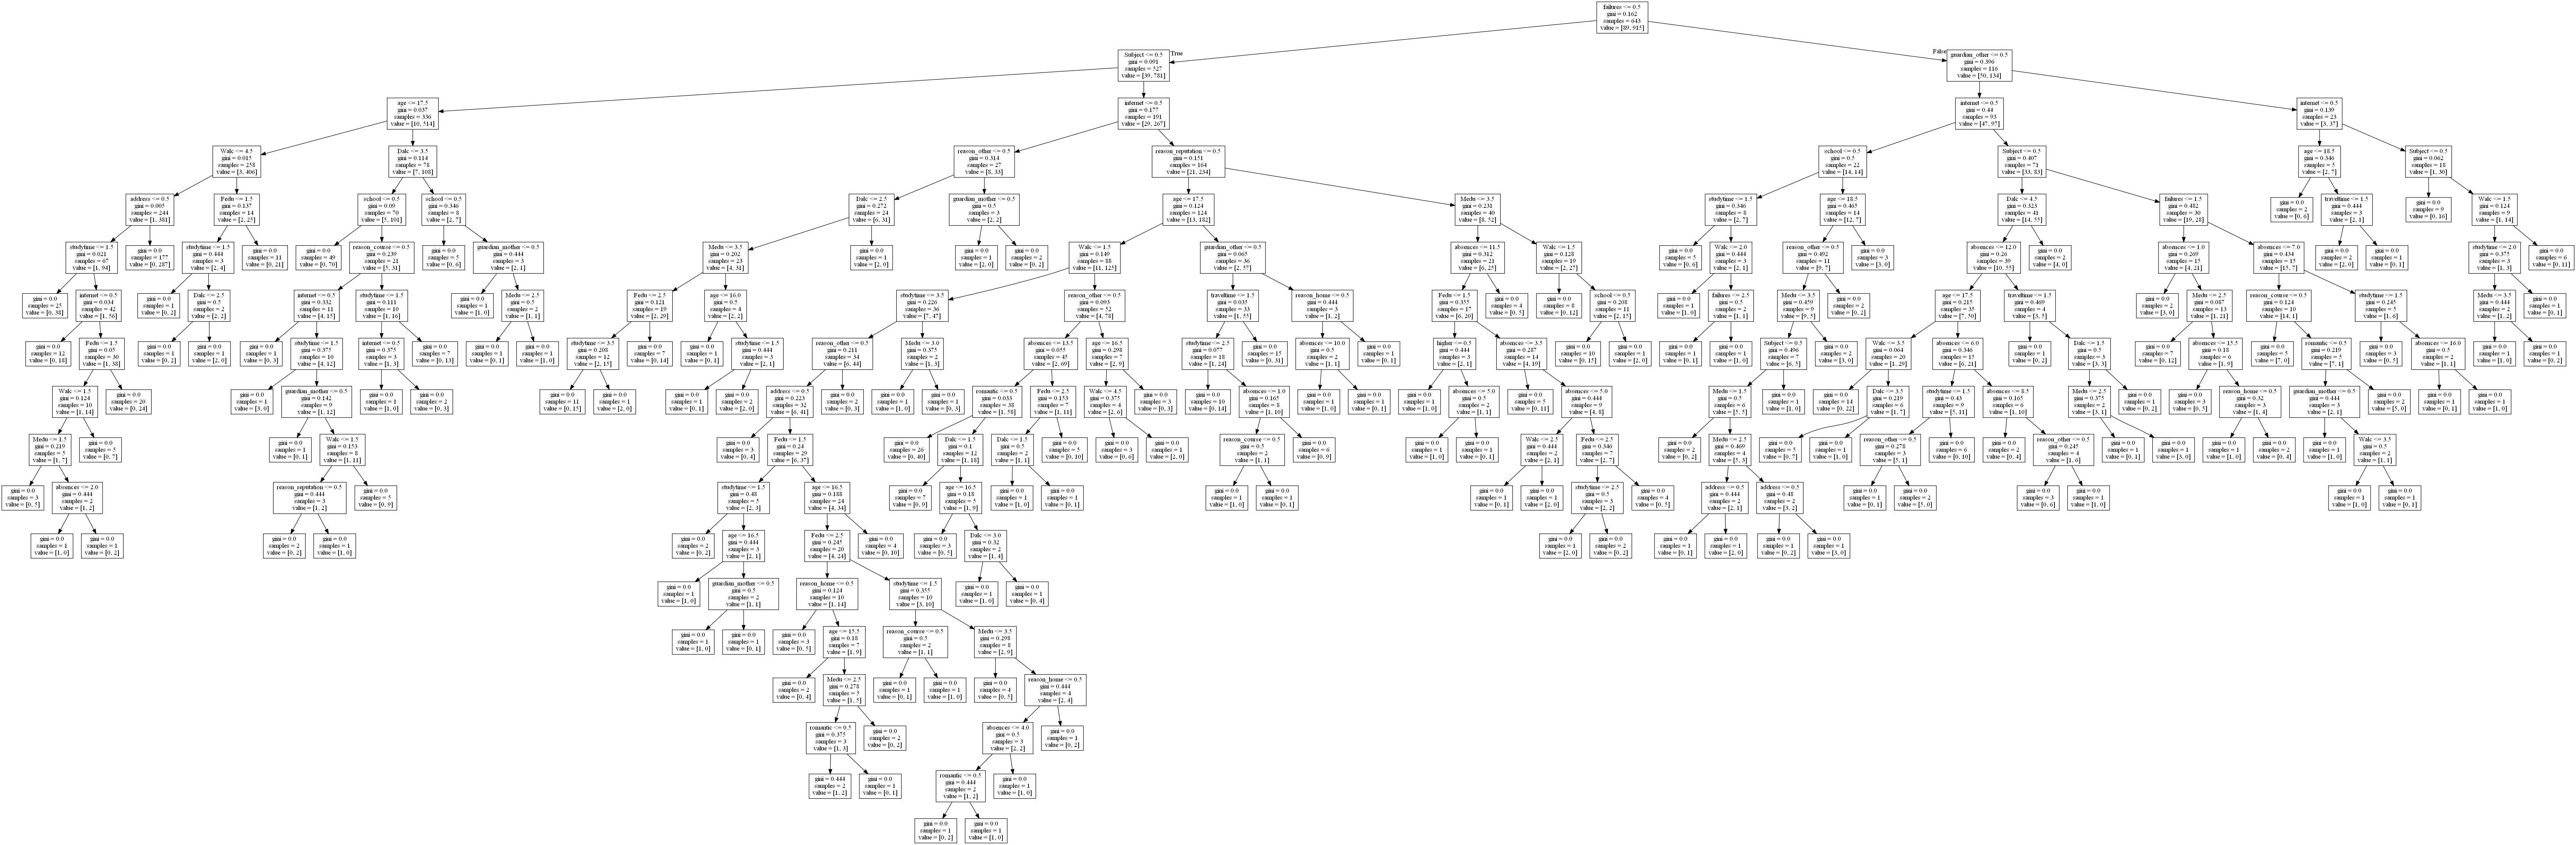

0.8974179104477612
Train: 0.9701120797011208
Test: 0.9601990049751243


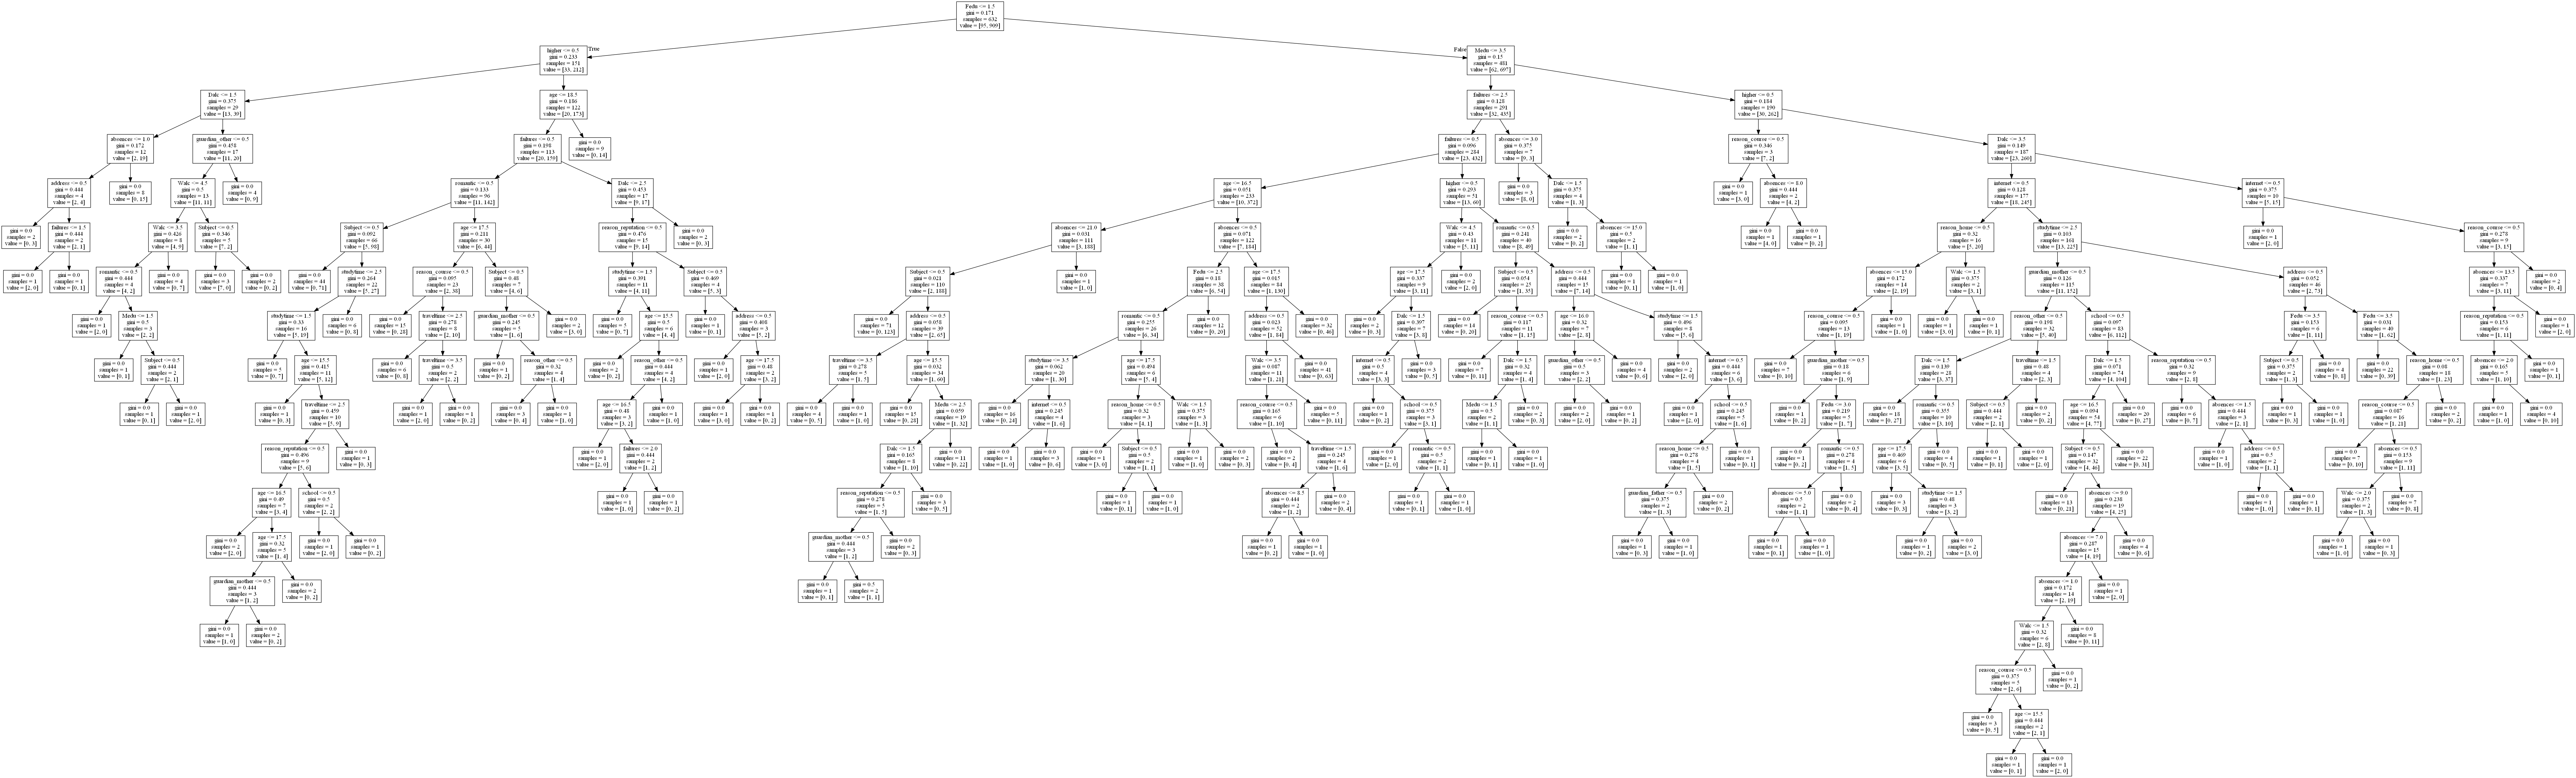

0.9043731343283582
Train: 0.987546699875467
Test: 0.9800995024875622


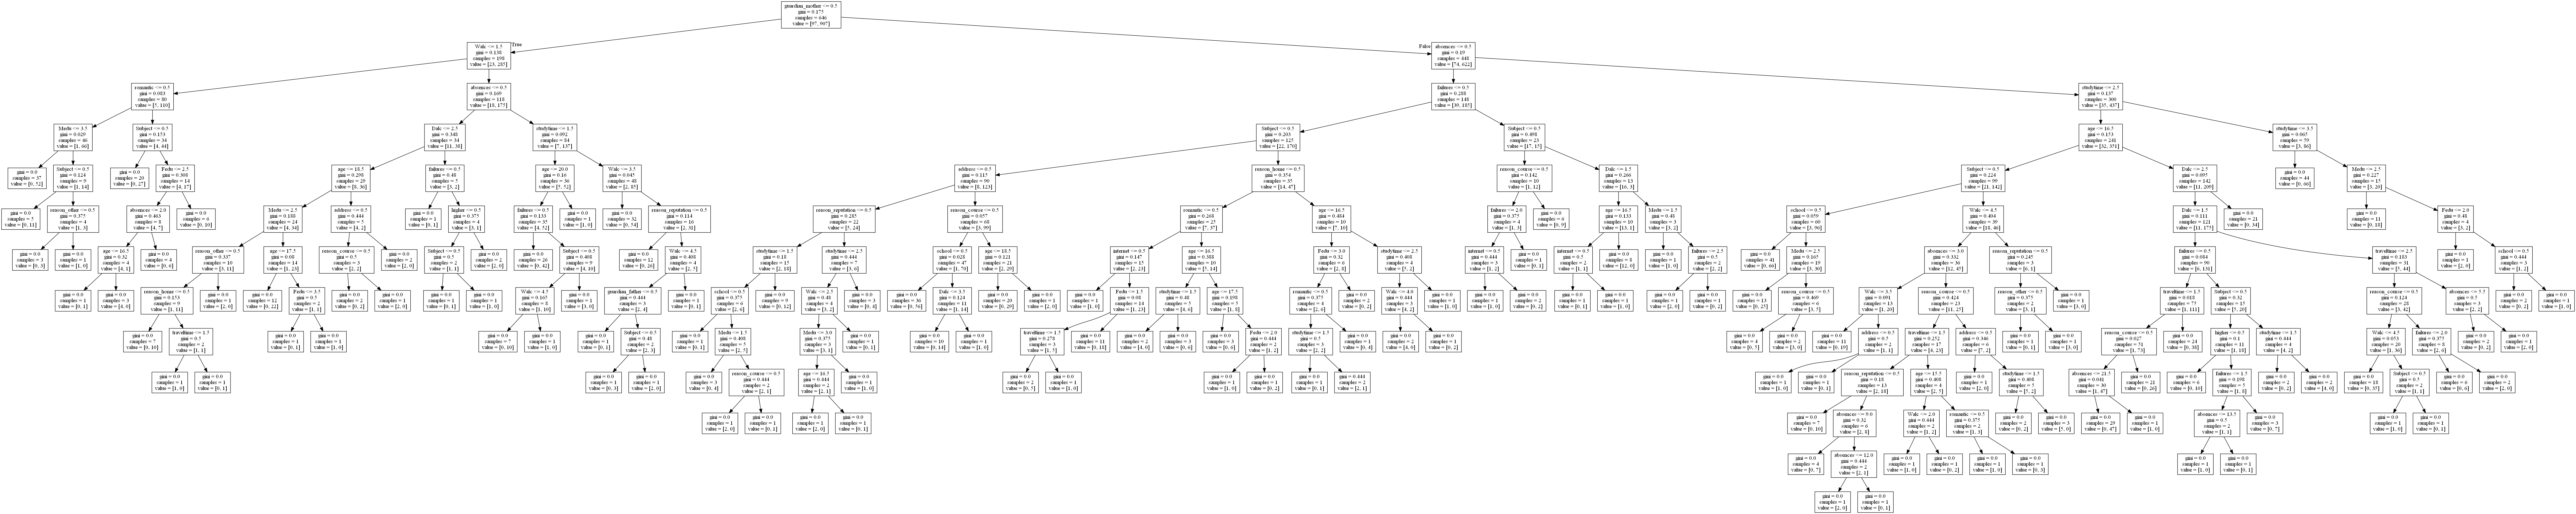

0.9043781094527364
Train: 0.9962640099626401
Test: 1.0


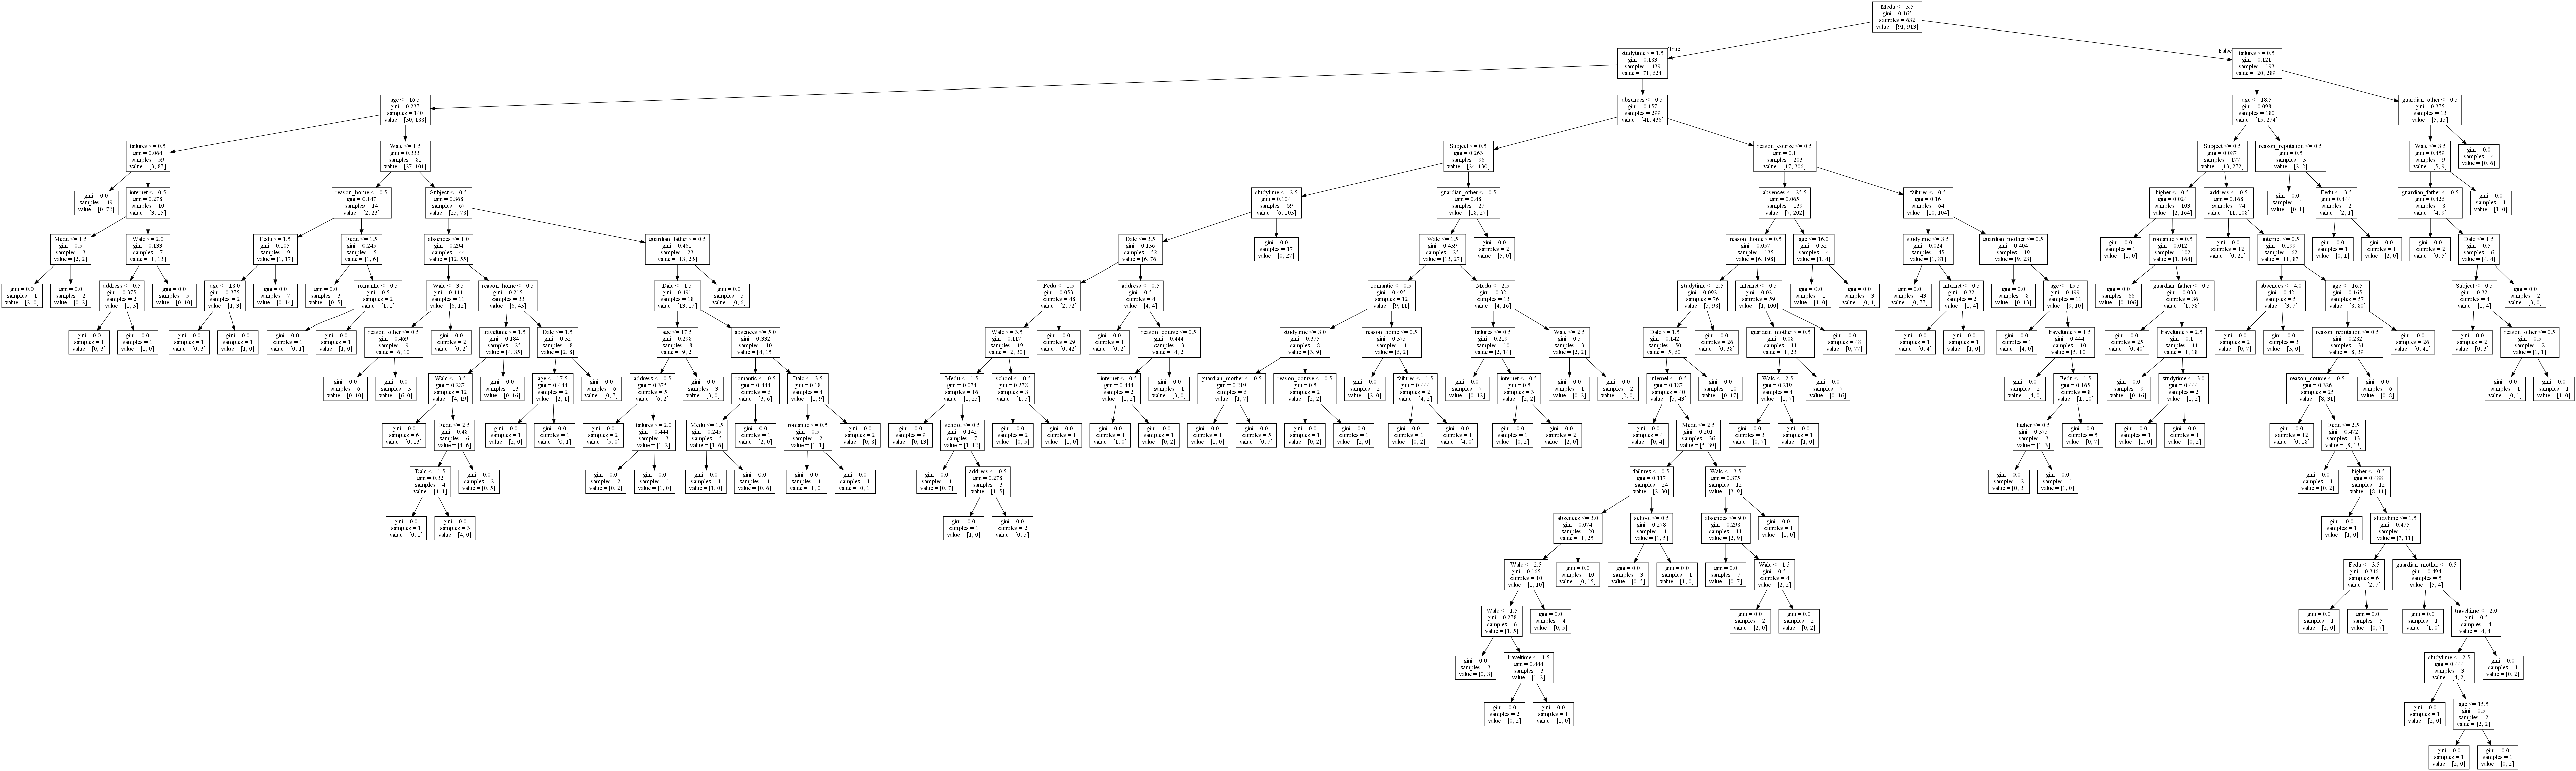

0.9073731343283582
Train: 0.9950186799501868
Test: 1.0


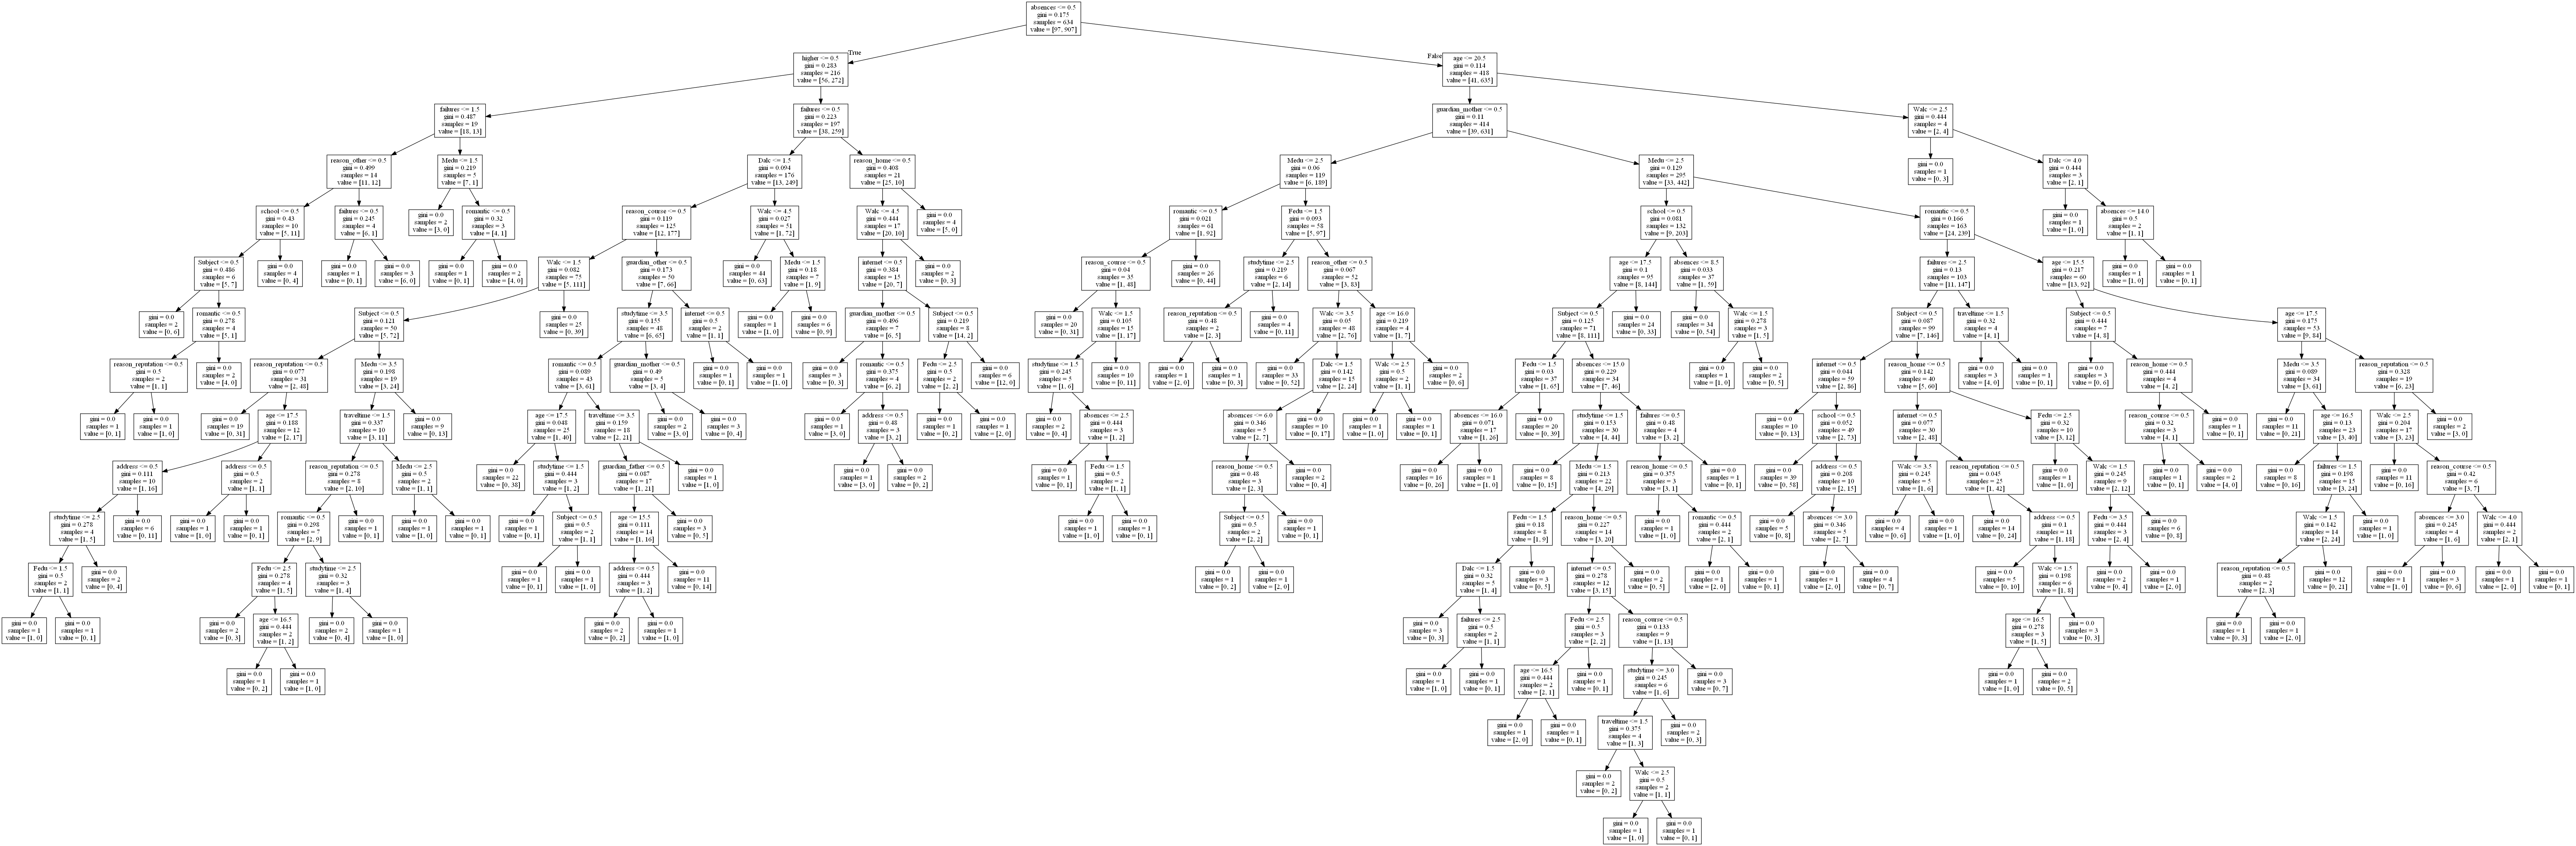

0.9073681592039801
Train: 0.9987546699875467
Test: 0.9950248756218906


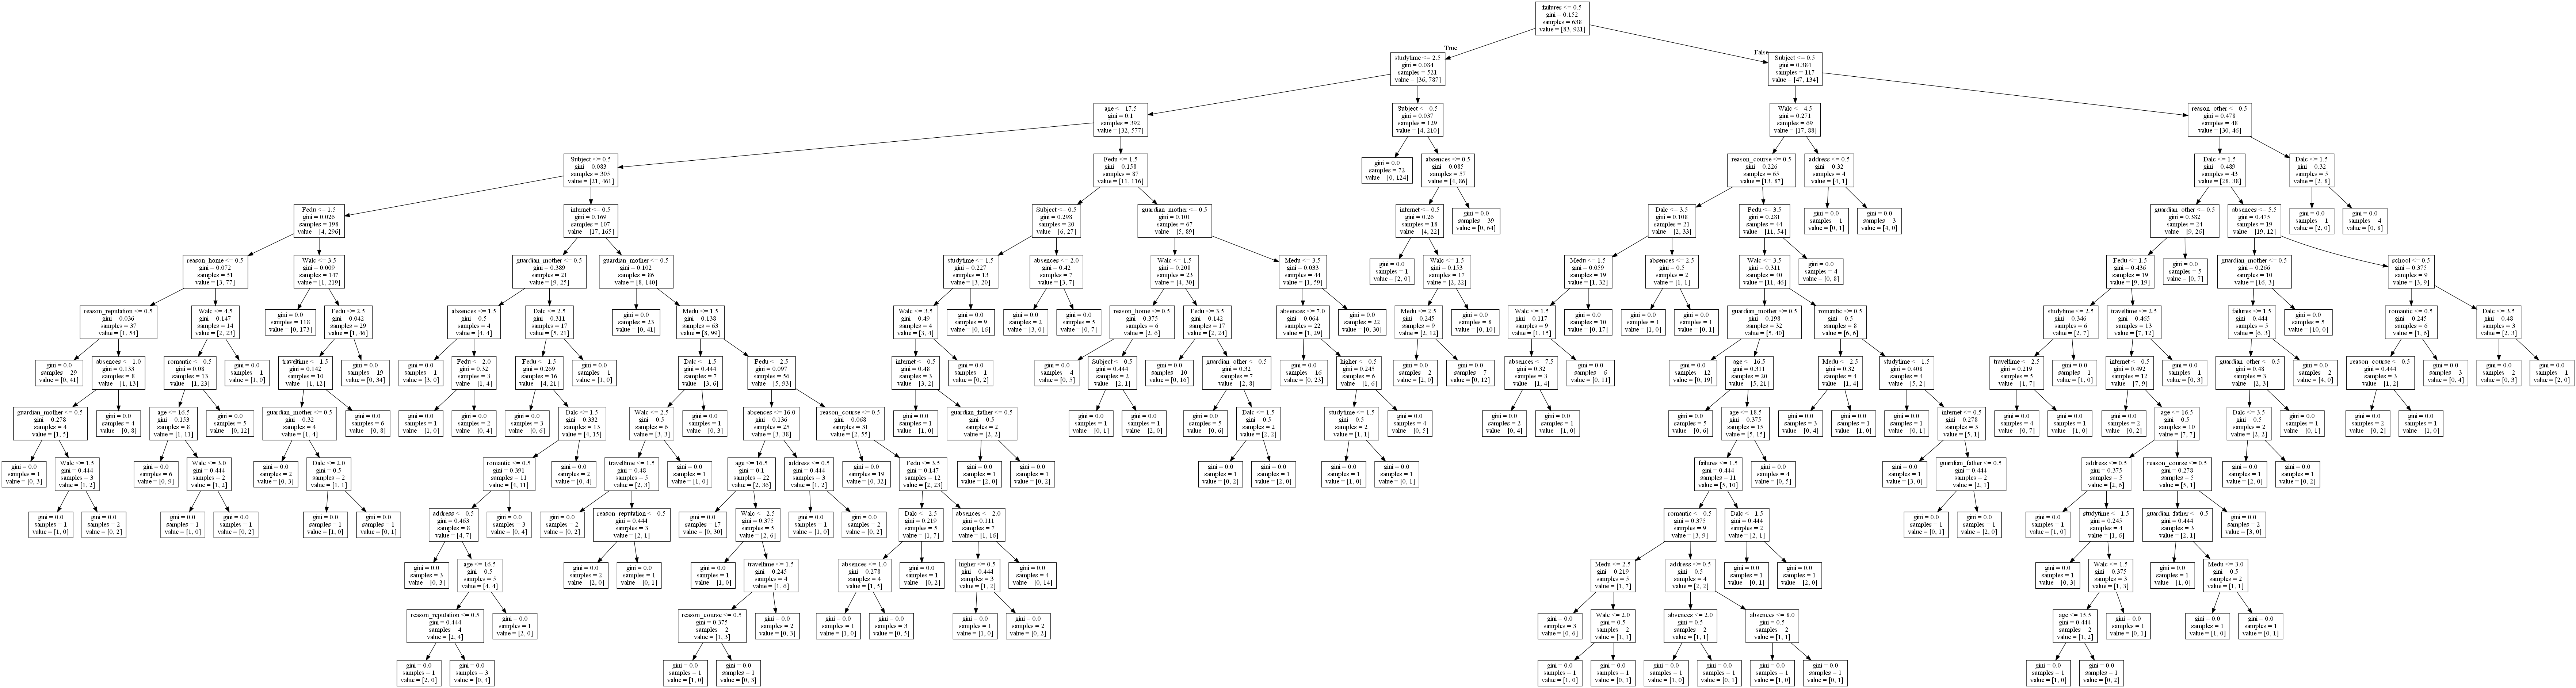

In [163]:
n_estimators= [1,2,3,5,10,20,50,100]
for i in n_estimators:
    cvs = cross_val_score(RandomForestClassifier(n_estimators=i), X, y, cv=5,n_jobs=2)
    
    print( cvs.mean())
    print('Train:',model.score(X_train, y_train))
    print('Test:',model.score(X_test, y_test))
    model = RandomForestClassifier(n_estimators=i).fit(X, y)

  
    graph = Source(export_graphviz(model.estimators_[0], out_file=None, feature_names=feature_names))
    png = graph.pipe(format='png')
    display(Image(png))


Видно, что cvs.mean()  растет с увеличением деревьем, но для 50 и 100 деревьев результаты практически одинаковы. В данном случае, 50 или 100 деревьев, как мне кажется, уже будет использовать неоптимально. 

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Обучите Random Forest  с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

In [148]:
%%time


f1_scorer = make_scorer(f1_score, pos_label="yes")
params_rf = {'n_estimators': [5,10,20,50, 100, 200], 'max_depth': range(2, 7), 'min_samples_split': range(2, 11, 2)}
# Instantiate a random forests regressor 'rf'
rf = RandomForestClassifier(random_state=17, oob_score = True)
grid_rf = GridSearchCV(estimator=rf, param_grid = params_rf, cv = 5, scoring=f1_scorer, 
verbose=1, n_jobs = 2)

grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Wall time: 1min 27s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=17),
             n_jobs=2,
             param_grid={'max_depth': range(2, 7),
                         'min_samples_split': range(2, 11, 2),
                         'n_estimators': [5, 10, 20, 50, 100, 200]},
             scoring=make_scorer(f1_score, pos_label=yes), verbose=1)

In [149]:
def draw_roc_auc_curve(y_test, y_pred_proba,title):
    fpr, tpr, treshold = roc_curve(y_test, y_pred_proba[:,1])
    roc_auc = auc(fpr, tpr)
    # строим график
    plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{title} ROC-кривой')
    plt.legend(loc="lower right")
    plt.show()

Посчитаем f1 для всего ансамбля

Best hyperparameters:
 {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 5}
F1:  0.9476439790575917


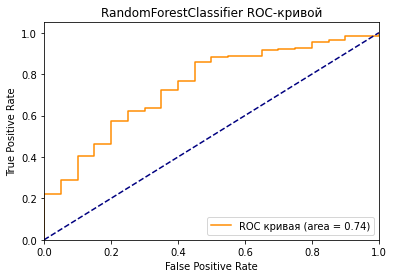

In [150]:
best_hyperparams = grid_rf.best_params_
print('Best hyperparameters:\n', best_hyperparams)
best_model_rf = grid_rf.best_estimator_
# Predict the test set labels...
y_pred = best_model_rf.predict(X_test)
print('F1: ',f1_score(y_test, y_pred))

y_pred_proba = best_model.predict_proba(X_test)
roc_auc_log = roc_auc_score(y_test, y_pred_proba[:,1])
draw_roc_auc_curve(y_test, y_pred_proba,"RandomForestClassifier")

Подсчитаем и провизуализируем f1 для каждого дерева отдельно(всего 5).Видно что различие на 0,001.

[0.9476439790575917, 0.9414893617021277, 0.9476439790575917, 0.9476439790575917, 0.9476439790575917]


Text(0, 0.5, 'F1 score')

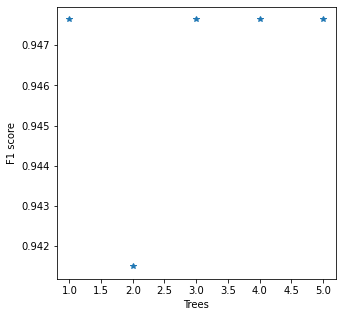

In [151]:
estimator = best_model_rf.estimators_
f1=[]
for tree_in_forest in estimator:
    f1.append(f1_score(y_test,  tree_in_forest.predict(X_test)))
print(f1)
fig = plt.figure(figsize=(5, 5))   
plt.plot([x for x in range(1, len(f1) + 1)], f1, "*")
plt.xlabel('Trees')
plt.ylabel('F1 score')

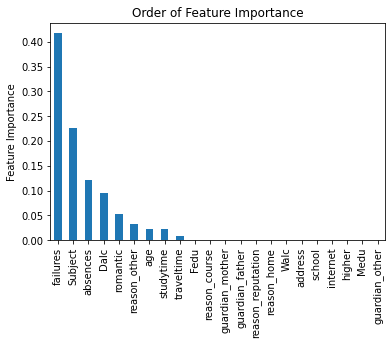

In [152]:
Relative_Feature_importance = pd.Series(best_model_rf.feature_importances_, feature_names).sort_values(ascending=False)
Relative_Feature_importance.plot(kind='bar', title='Order of Feature Importance')
plt.ylabel('Feature Importance')
plt.show()

Метрика F1 score (показывает какую часть отрицательных случаев модель правильно классифицирует) показывает неплохие результаты = 0.95. Как видно на графике распределния важности признаков, наибольшую значимость играют failures.

### Задание 4  
  
* Примените логистическую регрессию для решения задачи, подберите оптимальные значения гиперпараметров. Оцените качество (roc auc) на 5-foldпостройте валидации из 2 повторений. 
* Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Обучите логистическую модель с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество -  ROC-кривую, вычислите roc auc. Вычислите аналогичную метрику для Random Forest из Задания 3, сравните точность моделей. 

Подберем гипер параметры

In [164]:
from sklearn.linear_model import LogisticRegression
parameters = {'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20)}
logit = GridSearchCV(LogisticRegression(random_state=0),parameters,cv = 5, verbose=True, n_jobs=2)
logit.fit(X_train, y_train)
best_hyperparams = logit.best_params_
print('Best hyperparameters:\n', best_hyperparams)
best_model = logit.best_estimator_
# Predict the test set labels...
y_pred = best_model.predict(X_test)
roc_auc_log = roc_auc_score(y_test, y_pred)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best hyperparameters:
 {'C': 0.615848211066026, 'penalty': 'l2'}


Сравним данные двух замеров, видно,что площадь под графиком логистическое регрессии больше.

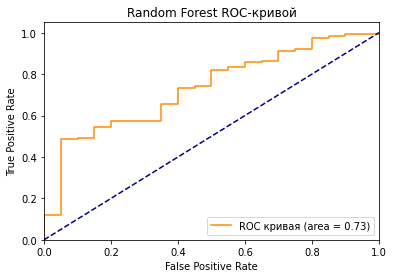

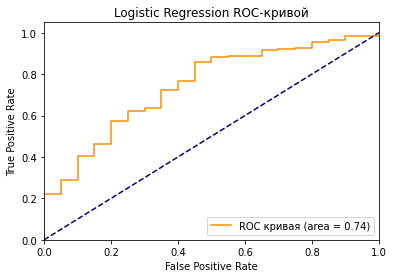

In [165]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = best_model_rf.predict_proba(X_test)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba[:,1])
draw_roc_auc_curve(y_test, y_pred_proba,"Random Forest")


y_pred_proba = best_model.predict_proba(X_test)
roc_auc_log = roc_auc_score(y_test, y_pred_proba[:,1])
draw_roc_auc_curve(y_test, y_pred_proba,"Logistic Regression")

In [166]:
print(f"Roc_auc LogisticRegression = {roc_auc_log}\nRoc_auc Random Forest = {roc_auc_rf}")

Roc_auc LogisticRegression = 0.7439226519337017
Roc_auc Random Forest = 0.732596685082873


### Задание 5  
  
* Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.  
* Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.  
* Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.  
* Обучите модель с настроенными параметрами на всех данных для моделирования и оцените качество на отложенной выборке. Сравните результаты с другими моделями, дайте комментарий.

0.9014179104477613
[22:53:19] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train: 0.9414694894146949
Test: 0.9104477611940298


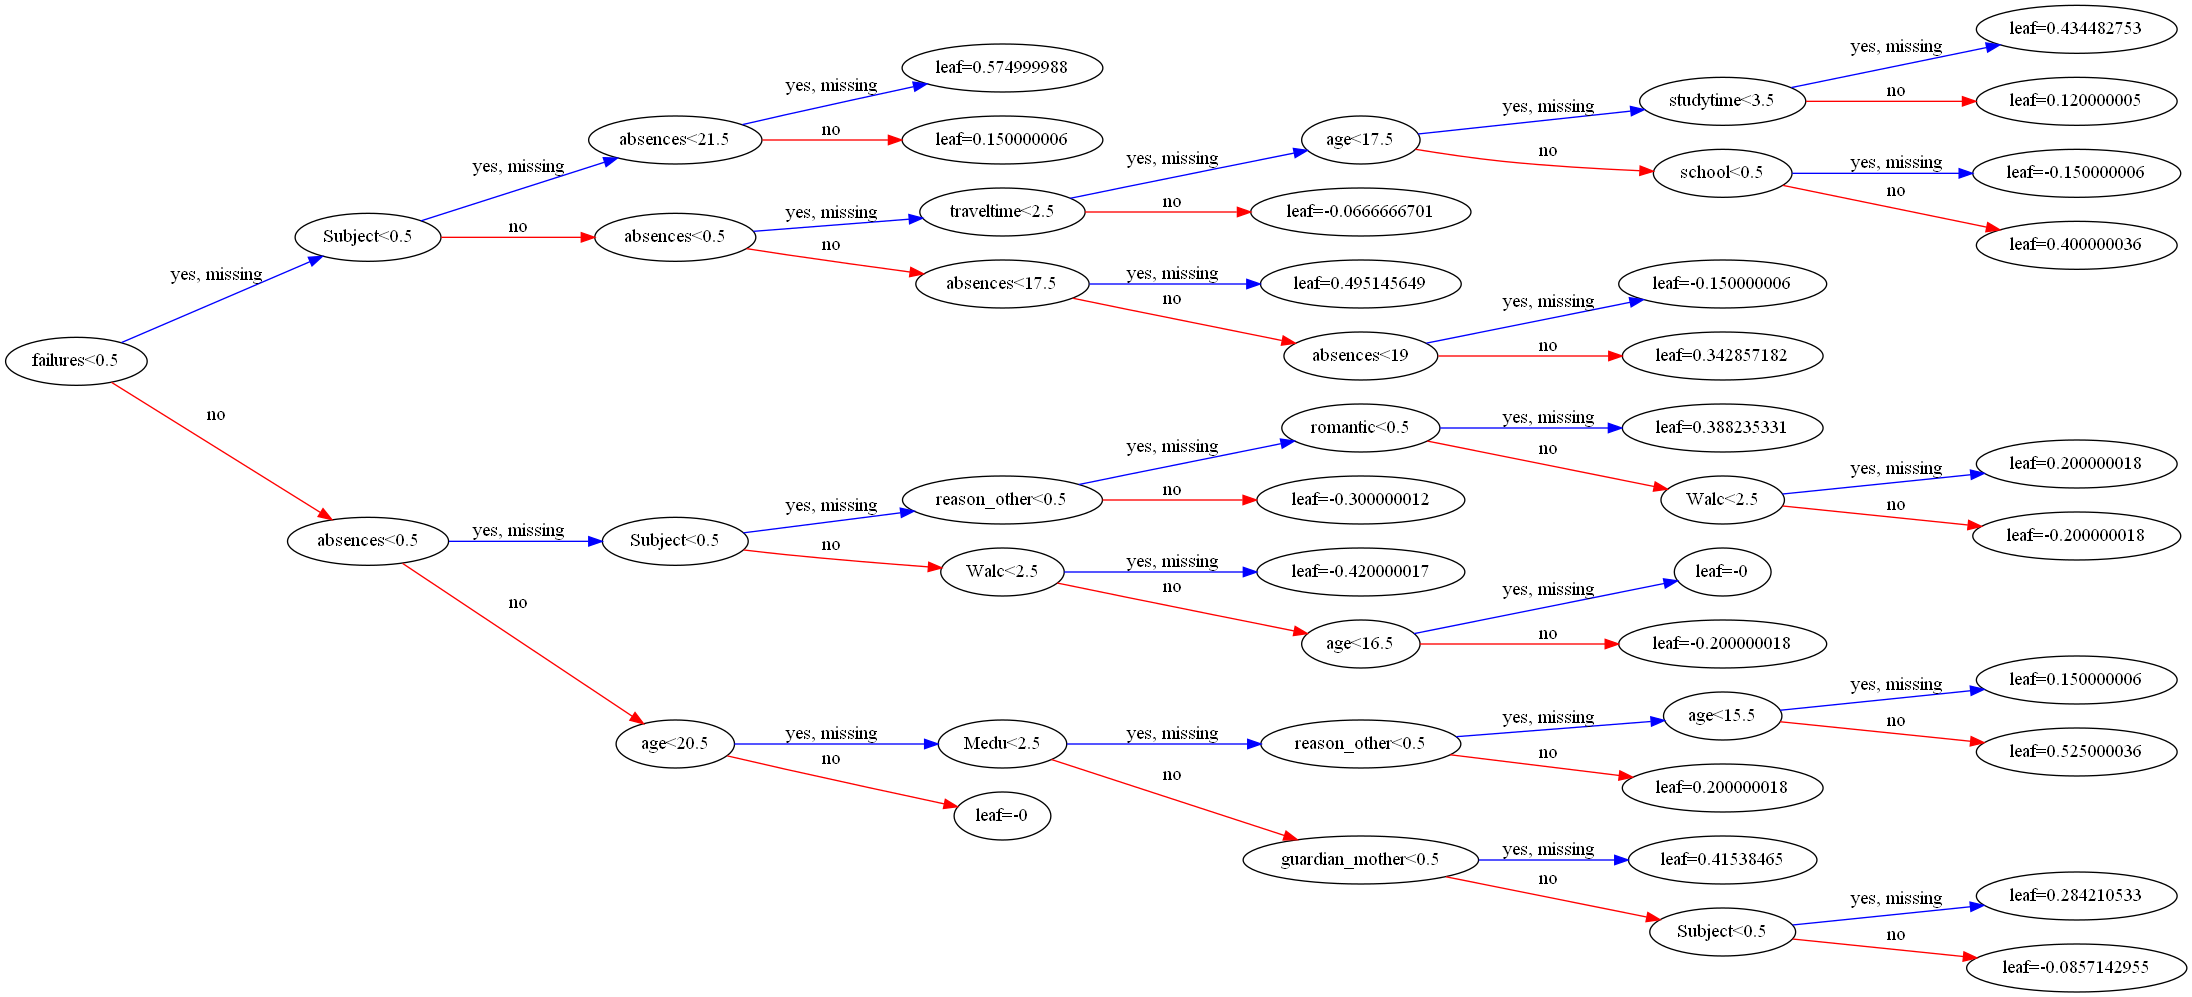

0.9093830845771145
[22:53:20] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train: 0.9389788293897883
Test: 0.9203980099502488


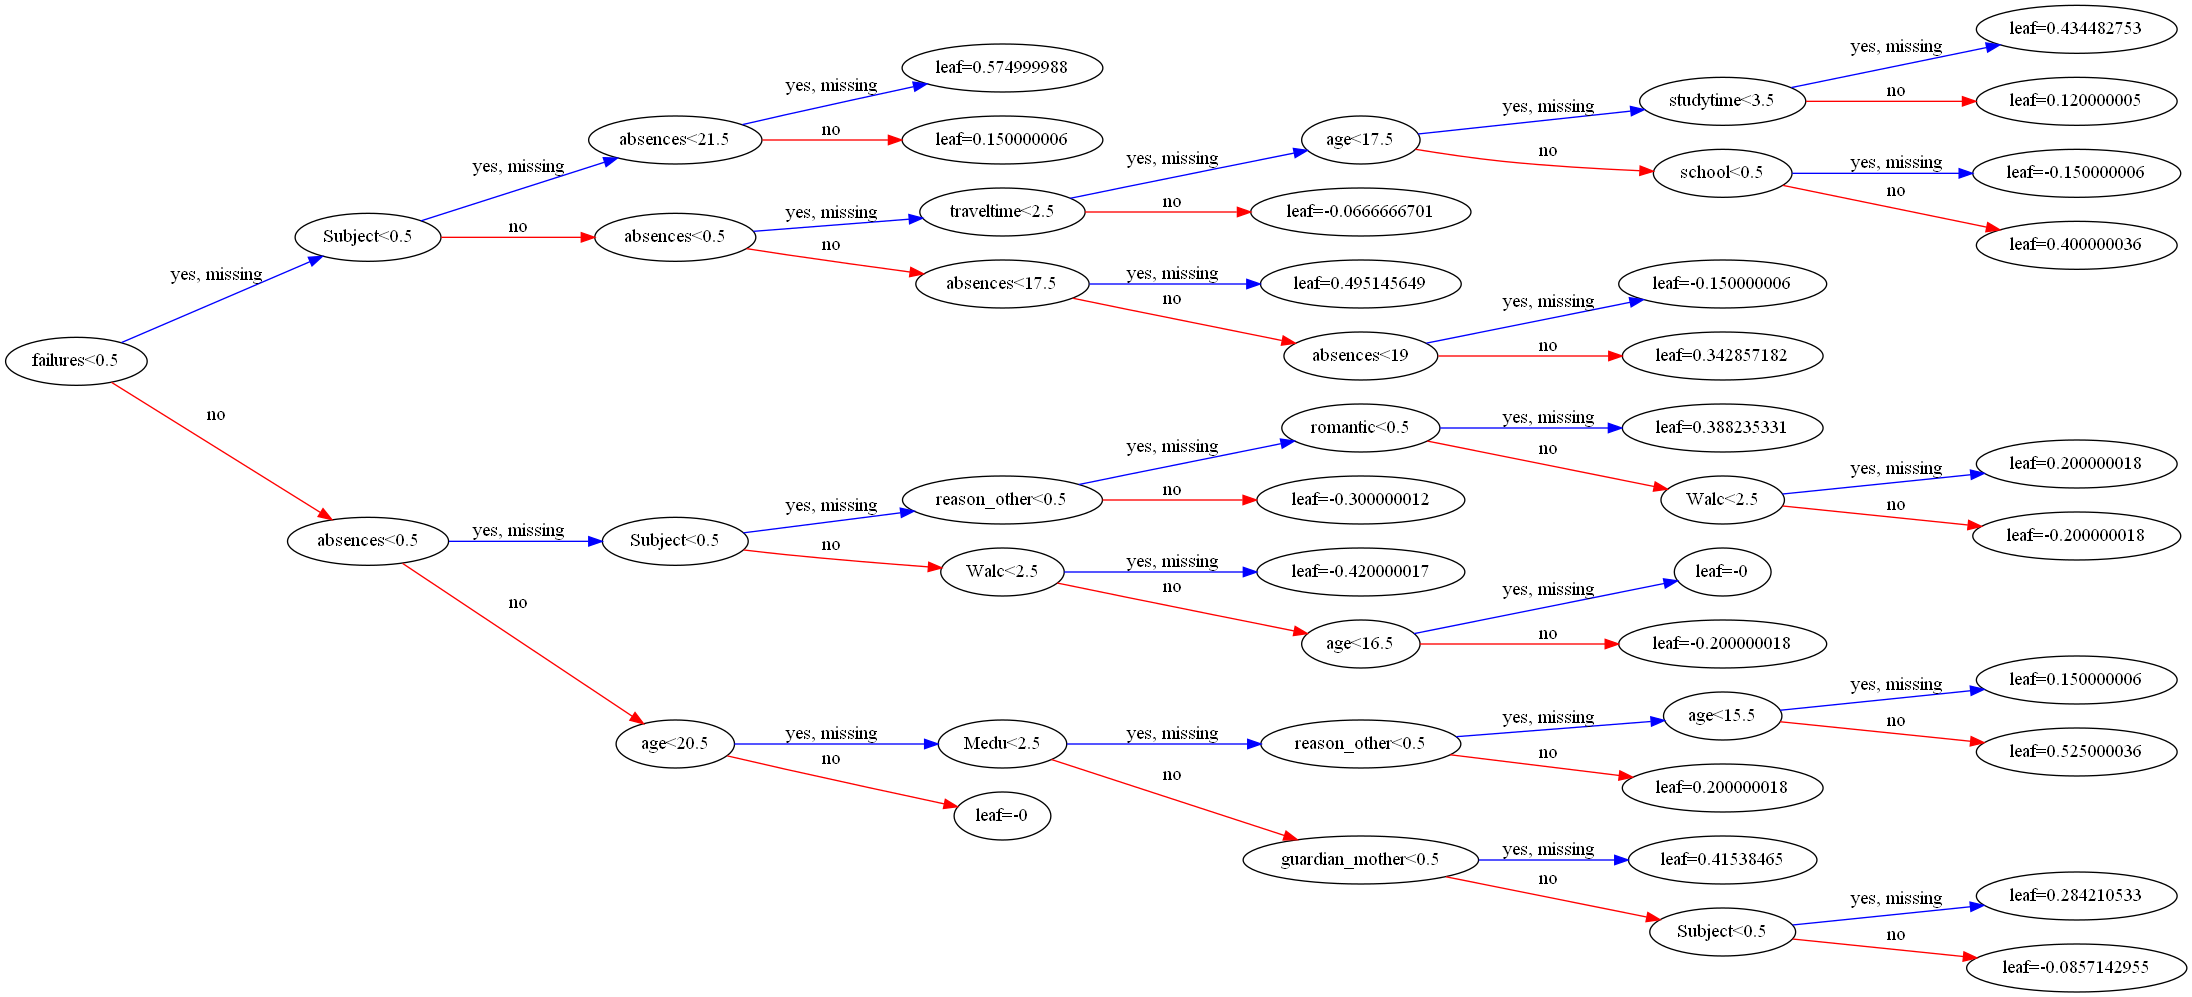

0.9053880597014924
[22:53:20] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train: 0.9514321295143213
Test: 0.9253731343283582


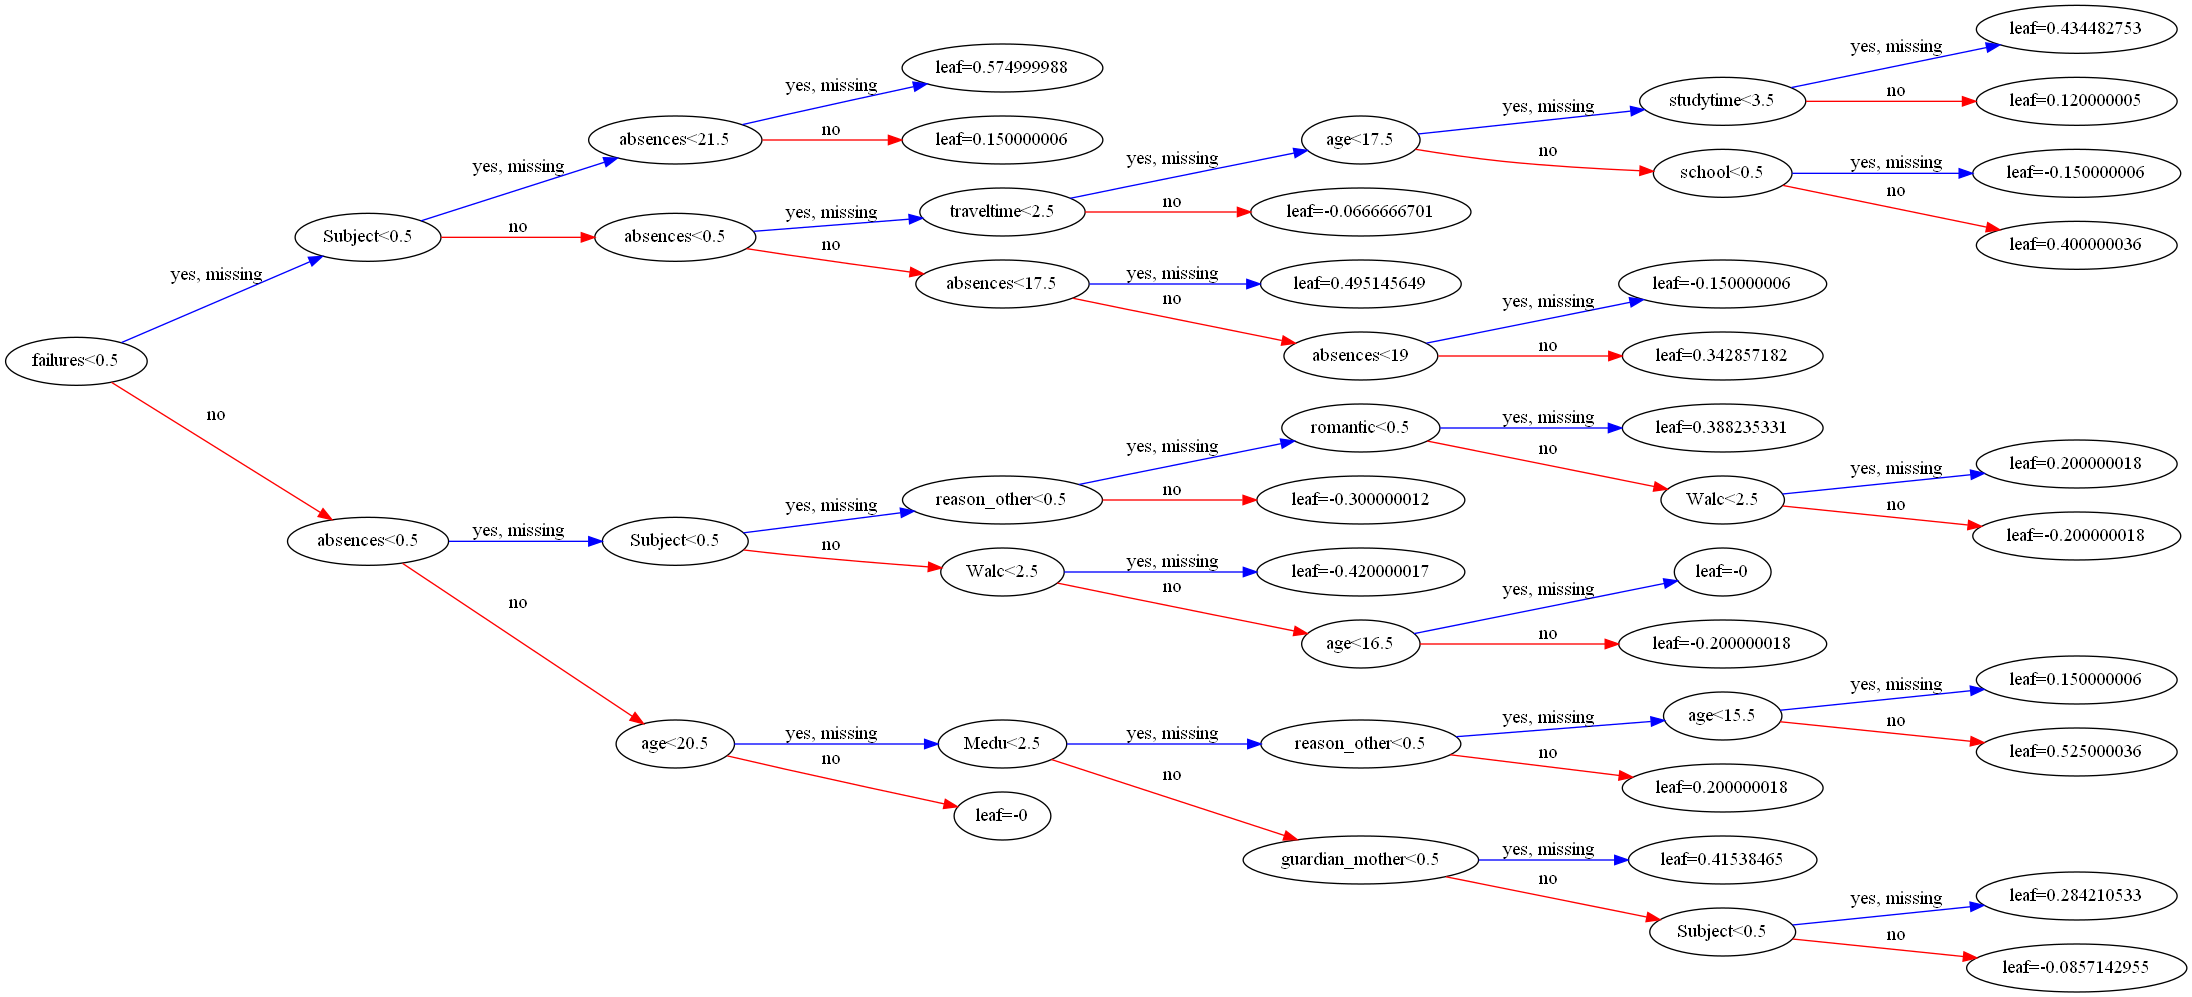

0.9103731343283583
[22:53:21] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train: 0.9476961394769614
Test: 0.9353233830845771


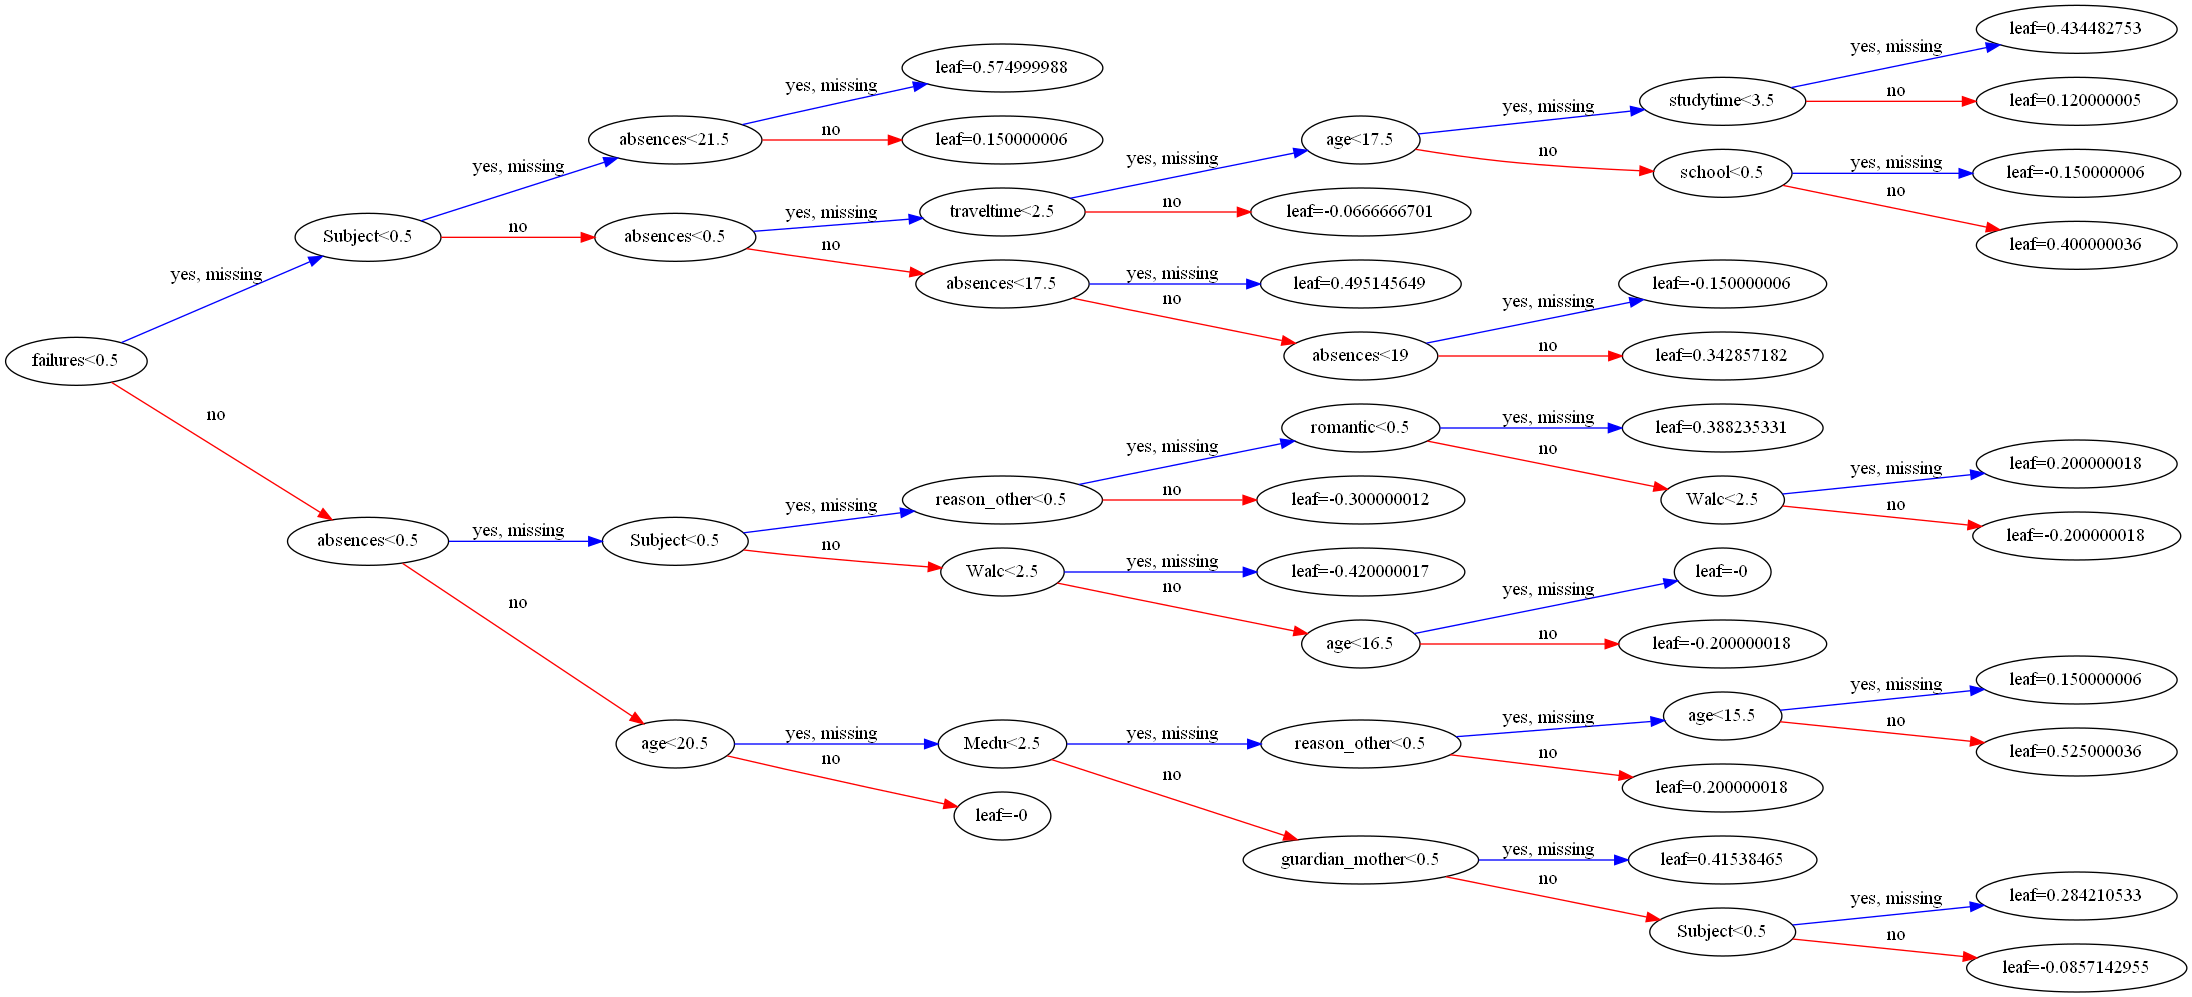

0.9113681592039802
[22:53:21] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train: 0.9613947696139477
Test: 0.9502487562189055


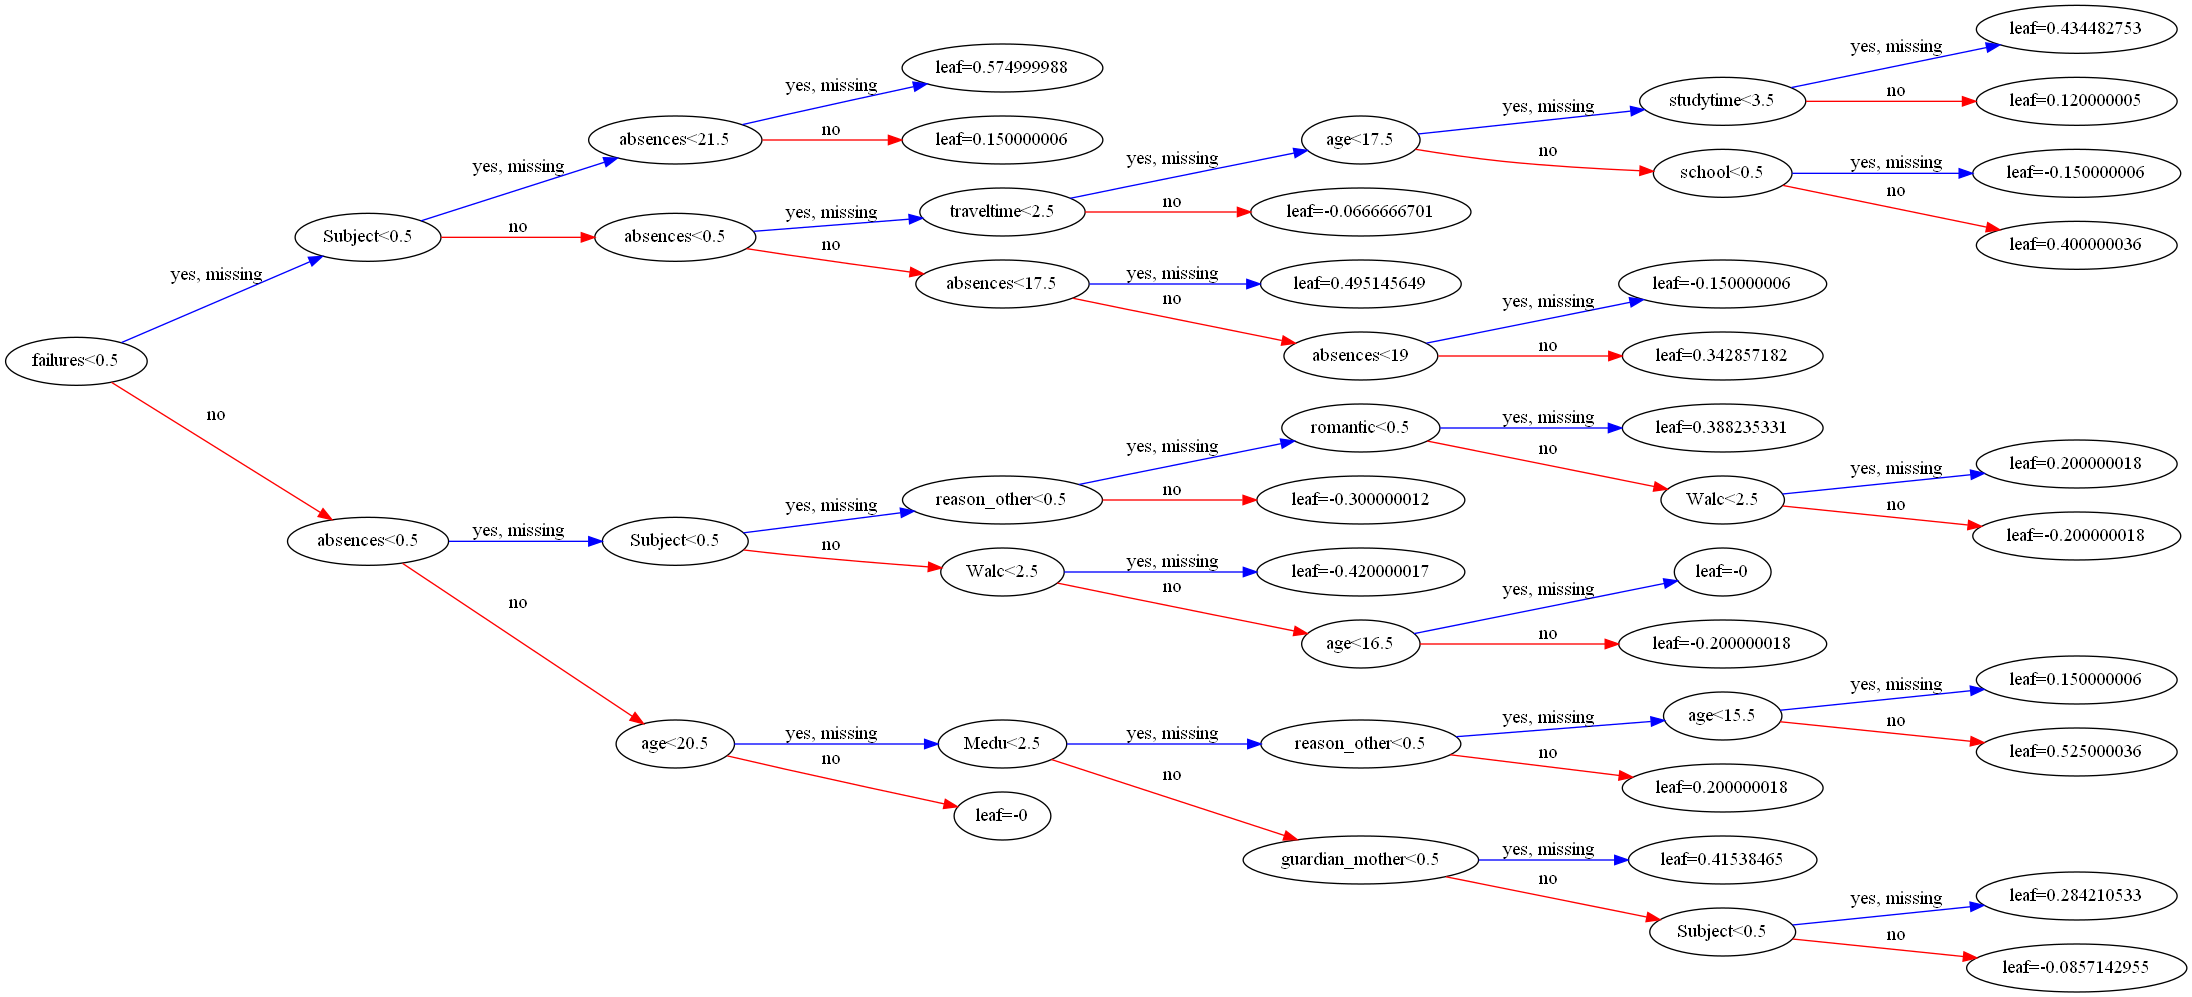

In [167]:
n_estimators= [1,2,3,5,10]
for i in n_estimators:
    cvs = cross_val_score(XGBClassifier(n_estimators=i), X, y, cv=5,n_jobs=2)
    
    print( cvs.mean())
    model = XGBClassifier(n_estimators=i).fit(X, y)
    print('Train:',model.score(X_train, y_train))
    print('Test:',model.score(X_test, y_test))
    
    
    xgb.to_graphviz(model, num_trees=0, rankdir='LR')
    graph = Source(xgb.to_graphviz(model, num_trees=0, rankdir='LR'))
    png = graph.pipe(format='png')
    display(Image(png))  

С увеличением количества деревьев качество растет. Если для одного дерева результат на Test: 0.91, то для 10 Test: 0.950

In [168]:
%%time
param_grid = [
    {'xgbclassifier__n_estimators': [1000],
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2], 
    'xgbclassifier__max_depth': [3, 6, 9],
    'xgbclassifier__min_child_weight': [1, 3, 5],
    'xgbclassifier__objective': ['multi:softmax'],
    'xgbclassifier__gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5] }
]

grid_model_xgb = GridSearchCV(
    estimator= XGBClassifier(),
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=3,
    verbose=True,
    scoring=f1_scorer
)

grid_model_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 270 candidates, totalling 810 fits
[22:54:57] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:573: 
Parameters: { "xgbclassifier__gamma", "xgbclassifier__learning_rate", "xgbclassifier__max_depth", "xgbclassifier__min_child_weight", "xgbclassifier__n_estimators", "xgbclassifier__objective" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:54:57] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1min 34s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     verbosity=None),
             n_jobs=4,
             param_grid=[{'xgbclassifier__gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
                          'xgbclassifier__learning_rate': [0.01, 0.05, 0.1,
                                                  

In [169]:
best_hyperparams = grid_model_xgb.best_params_
print('Best hyperparameters:\n', best_hyperparams)
best_model_rf = grid_model_xgb.best_estimator_
# Predict the test set labels...
y_pred = best_model_rf.predict(X_test)
f1_score(y_test, y_pred)

Best hyperparameters:
 {'xgbclassifier__gamma': 0, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 3, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__n_estimators': 1000, 'xgbclassifier__objective': 'multi:softmax'}


0.9436997319034852

##  Часть 4. Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* Для решения задачи примените следующие методы:  
  * KNN  
  * Логистическая регрессия  
  * Деревья решений  
  * Random Forest
  * Gradient Boosting
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, используйте confusion matrix и производные от нее метрики. Сделайте выводы.    

In [170]:
from sklearn.metrics import confusion_matrix
import pylab as pl

In [171]:
df.head()

Subject  school  age  address  Medu  Fedu  traveltime  studytime  failures  \
0        0       0   16        1     3     4           1          1         0   
1        0       0   17        1     3     2           1          2         0   
2        0       0   16        1     1     2           2          1         2   
3        0       1   17        1     2     3           2          2         0   
5        0       0   18        1     3     1           2          1         0   

   higher  internet  romantic  Dalc  Walc  absences  G1  G2  G3  \
0       1         1         0     1     4        12  15  13  14   
1       1         1         0     1     3         2  17  18  17   
2       1         1         0     3     5         0   9   8  10   
3       1         1         0     1     1         4  14  15  16   
5       1         1         1     4     5         2  11  11  12   

   reason_course  reason_home  reason_other  reason_reputation  \
0              1            0             0                  0   
1              1            0             0                  0   
2              1            0             0                  0   
3              0            1             0                  0   
5              1            0             0                  0   

   guardian_father  guardian_mother  guardian_other  
0                1                0               0  
1                0                1               0  
2                0                1               0  
3                1                0               0  
5                0                1               0

In [172]:
multi_df = df.copy()

for index, row in multi_df.iterrows():
    if (multi_df.at[index, 'G3'] < 8):
        multi_df.at[index, 'G3'] = 0
    if (multi_df.at[index, 'G3'] < 14 and multi_df.at[index, 'G3'] > 7 ):
        multi_df.at[index, 'G3'] = 1   
    if (multi_df.at[index, 'G3'] <18 and multi_df.at[index, 'G3'] >13 ):
        multi_df.at[index, 'G3'] = 2   
    if (multi_df.at[index, 'G3'] > 17):
        multi_df.at[index, 'G3'] = 3
multi_df.head(15)

Subject  school  age  address  Medu  Fedu  traveltime  studytime  \
0         0       0   16        1     3     4           1          1   
1         0       0   17        1     3     2           1          2   
2         0       0   16        1     1     2           2          1   
3         0       1   17        1     2     3           2          2   
5         0       0   18        1     3     1           2          1   
6         0       1   18        1     1     1           2          2   
7         0       1   15        0     4     4           2          1   
8         1       0   15        1     3     2           1          2   
9         0       1   16        0     3     4           3          2   
10        0       0   15        1     4     4           1          1   
11        0       0   18        1     3     4           1          2   
12        1       1   18        0     4     4           3          1   
13        0       0   15        1     4     3           1          2   
14        1       0   16        1     2     2           1          2   
15        1       0   17        0     1     3           3          2   

    failures  higher  internet  romantic  Dalc  Walc  absences  G1  G2  G3  \
0          0       1         1         0     1     4        12  15  13   2   
1          0       1         1         0     1     3         2  17  18   2   
2          2       1         1         0     3     5         0   9   8   1   
3          0       1         1         0     1     1         4  14  15   2   
5          0       1         1         1     4     5         2  11  11   1   
6          0       1         0         0     1     1         6  11  12   1   
7          0       1         1         1     3     5         0  13  14   2   
8          0       1         1         0     1     1        10   7   6   0   
9          0       1         0         0     1     2         4   9  10   1   
10         0       1         1         0     1     3         0  12  13   1   
11         0       1         1         1     1     3         6  16  16   2   
12         0       1         1         1     2     2         7   6   5   0   
13         0       1         1         0     2     3         0  11  11   1   
14         0       1         0         0     1     2         4   8   7   0   
15         1       1         1         0     1     4        20   9   7   1   

    reason_course  reason_home  reason_other  reason_reputation  \
0               1            0             0                  0   
1               1            0             0                  0   
2               1            0             0                  0   
3               0            1             0                  0   
5               1            0             0                  0   
6               1            0             0                  0   
7               1            0             0                  0   
8               0            0             0                  1   
9               0            0             1                  0   
10              1            0             0                  0   
11              0            1             0                  0   
12              0            0             0                  1   
13              0            1             0                  0   
14              1            0             0                  0   
15              1            0             0                  0   

    guardian_father  guardian_mother  guardian_other  
0                 1                0               0  
1                 0                1               0  
2                 0                1               0  
3                 1                0               0  
5                 0                1               0  
6                 0                1               0  
7                 0                1               0  
8                 0                1               0  
9                 0               

In [174]:
X = multi_df.drop(["G1", "G2", "G3"], axis = 1)
y = multi_df["G3"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 17, stratify=y)


## Логистическая регрессия

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.64      0.90      0.75       125
           2       0.50      0.24      0.32        50
           3       0.00      0.00      0.00         6

    accuracy                           0.62       201
   macro avg       0.29      0.28      0.27       201
weighted avg       0.52      0.62      0.55       201



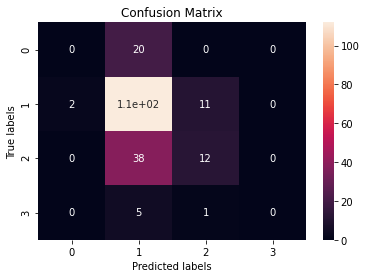

In [175]:
log_reg = LogisticRegression(max_iter = 10000, C=0.1)

log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)

# accuracy(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

Видно, что предсказание очень низкое. Подберем параметры на GridSearchCV

In [176]:
from sklearn.model_selection import  StratifiedKFold
c_values = np.linspace(1e-3, 1, 100)
penal = ['l1', 'l2']
tol = np.linspace(1e-4, 1, 8)
parameters = {'C': c_values, 'penalty': penal, 'tol': tol}
estimator = LogisticRegression(random_state=17, class_weight = 'balanced')
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=17)
model = GridSearchCV(estimator, parameters, cv=skf, scoring='accuracy', n_jobs = -1)
model.fit(X, y)
model.best_estimator_

LogisticRegression(C=0.011090909090909092, class_weight='balanced',
                   random_state=17)

              precision    recall  f1-score   support

           0       0.28      0.50      0.36        20
           1       0.66      0.42      0.51       125
           2       0.36      0.32      0.34        50
           3       0.05      0.33      0.08         6

    accuracy                           0.40       201
   macro avg       0.34      0.39      0.32       201
weighted avg       0.53      0.40      0.44       201



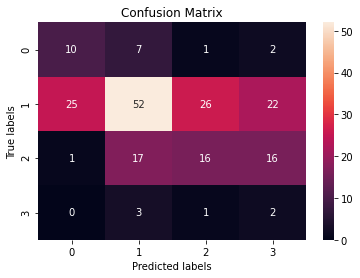

In [177]:
best = model.best_estimator_
best.fit(X_train, y_train)
y_pred=best.predict(X_test)
preds_prob = best.predict_proba(X_test)
# accuracy(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

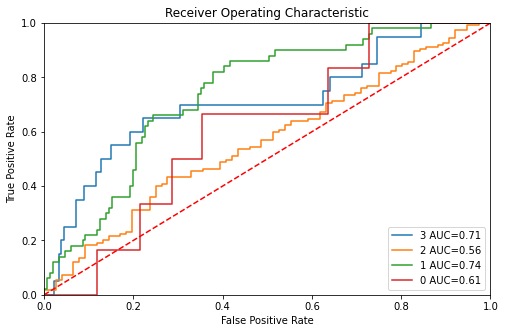

In [178]:
y_val_bin = label_binarize(y_test, classes=np.arange(y_train.nunique()))
plot_roc(y_val_bin, preds_prob, target_names=['3', '2', '1', '0'], figsize=(8,5))

По графику roc кривой видно, что модель хорошо предсказывает 3 (0,73), но не очень хорошо нули.

In [179]:
model.best_score_

0.4432475247524752

## KNN

[0.6344257425742574, 0.6344257425742574, 0.6354257425742574, 0.6244950495049504] ['euclidean', 'minkowski', 'manhattan', 'correlation']
Maximal accuracy score: 0.6354257425742574


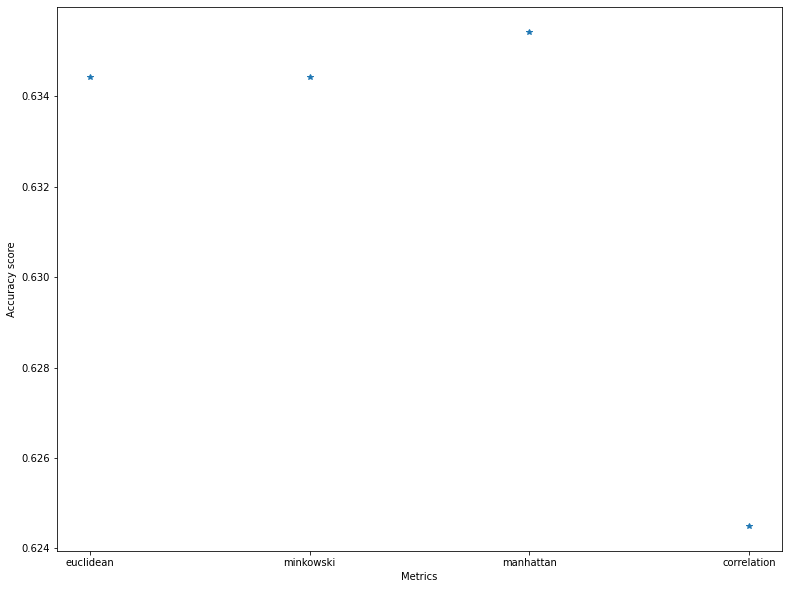

In [181]:
def metric():
    metrics = ['euclidean', 'minkowski', 'manhattan','correlation']
    acc = []
    for i in metrics:
        parameters = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric': [f'{i}'],
             'n_neighbors': range(3, 11)}
        estimator = KNeighborsClassifier()
        model = GridSearchCV(estimator, parameters, cv=skf, scoring='accuracy', n_jobs = -1)
        model.fit(X, y)
        acc.append(model.best_score_)
    print(acc,metrics)
    fig = plt.figure(figsize=(13, 10))   
    plt.plot(metrics, acc, "*")
    plt.xlabel('Metrics')
    plt.ylabel('Accuracy score')
    print(f'Maximal accuracy score: {max(acc)}')
metric_viz()

In [182]:
parameters = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
              'metric': ['euclidean', 'minkowski', 'manhattan','correlation'],
             'n_neighbors': range(3, 11)}
estimator = KNeighborsClassifier()
model = GridSearchCV(estimator, parameters, cv=skf, scoring='accuracy', n_jobs = -1)
model.fit(X, y)
model.best_score_


0.6354257425742574

              precision    recall  f1-score   support

           0       0.67      0.10      0.17        20
           1       0.66      0.86      0.75       125
           2       0.41      0.28      0.33        50
           3       0.00      0.00      0.00         6

    accuracy                           0.62       201
   macro avg       0.44      0.31      0.31       201
weighted avg       0.58      0.62      0.57       201

ROC AUC: 
    macro: 0.62072 
    weighted: 0.59994


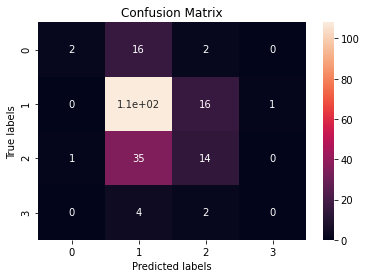

In [183]:
best = model.best_estimator_
best.fit(X_train, y_train)
y_pred=best.predict(X_test)
preds_prob = best.predict_proba(X_test)
print(metrics.classification_report(y_test, y_pred))
print('ROC AUC:',
     '\n    macro:', round(metrics.roc_auc_score(y_test, preds_prob, multi_class='ovr', average='macro'), 5),
     '\n    weighted:', round(metrics.roc_auc_score(y_test, preds_prob, multi_class='ovr', average='weighted'), 5))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

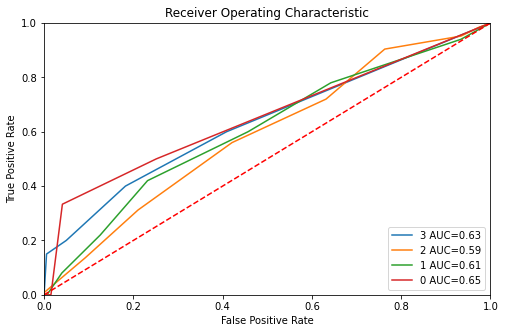

In [184]:
y_val_bin = label_binarize(y_test, classes=np.arange(y_train.nunique()))
plot_roc(y_val_bin, preds_prob, target_names=['3', '2', '1', '0'], figsize=(8,5))

В целом выводы по roc кривой низкие, очень длизки к рандому.

## Dicision Tree

Maximal accuracy score: 0.6218905472636815


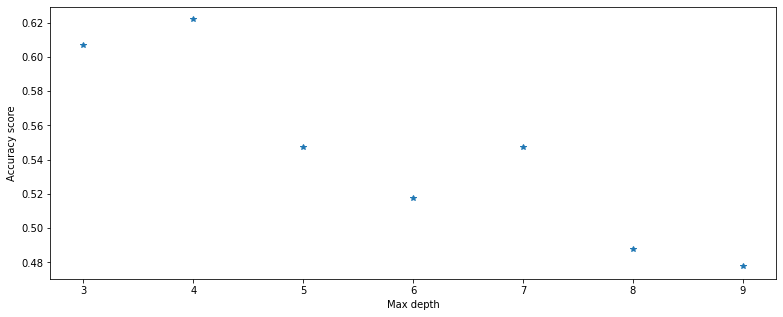

In [186]:
acc = []

for i in range(3, 10):
    estimator = DecisionTreeClassifier(random_state=17, max_depth = i).fit(X_train, y_train)
    acc.append(accuracy_score(estimator.predict(X_test), y_test))

fig = plt.figure(figsize=(13, 5))

plt.plot(range(3, 10), acc, "*")
plt.xlabel('Max depth')
plt.ylabel('Accuracy score')

print(f'Maximal accuracy score: {max(acc)}')

In [187]:
md = range(3, 10)
parameters = {'max_depth': md}
estimator = DecisionTreeClassifier(random_state=17)
clf = GridSearchCV(estimator, parameters, scoring='accuracy', cv=skf, n_jobs = -1)
clf.fit(X, y)
clf.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=17)

0.6374554455445544
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.62      0.98      0.76       125
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00         6

    accuracy                           0.61       201
   macro avg       0.15      0.24      0.19       201
weighted avg       0.38      0.61      0.47       201

ROC AUC: 
    macro: 0.59899 
    weighted: 0.61836


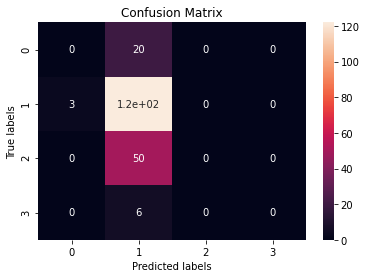

In [188]:
best = clf.best_estimator_
best.fit(X_train, y_train)
y_pred=best.predict(X_test)
preds_prob = best.predict_proba(X_test)
print(clf.best_score_)
print(metrics.classification_report(y_test, y_pred))
print('ROC AUC:',
     '\n    macro:', round(metrics.roc_auc_score(y_test, preds_prob, multi_class='ovr', average='macro'), 5),
     '\n    weighted:', round(metrics.roc_auc_score(y_test, preds_prob, multi_class='ovr', average='weighted'), 5))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

## Random Forest

In [189]:
rf = RandomForestClassifier(random_state=17, oob_score = True).fit(X, y)
rf.oob_score_

0.6623505976095617

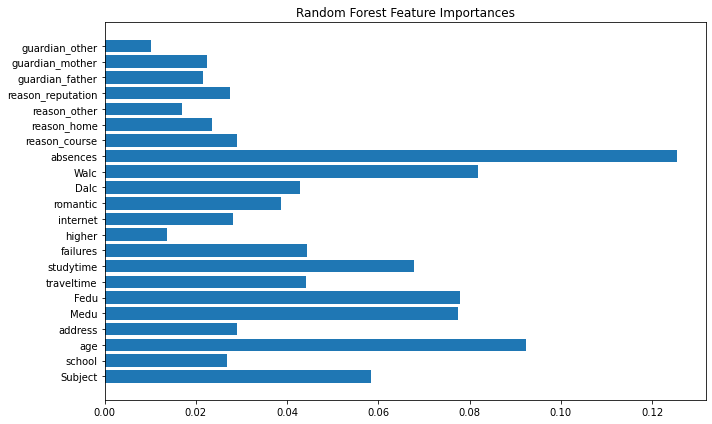

In [190]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(X.columns, rf.feature_importances_)
ax.set_yticklabels(X.columns)
ax.set_yticks(X.columns)
ax.set_title("Random Forest Feature Importances")
fig.tight_layout()
plt.show()

In [191]:
n_estimators = [5,10,20,50, 100, 200, 300]
md = range(3, 8)
parameters = {'n_estimators': n_estimators, 'max_depth': md}
estimator = RandomForestClassifier(random_state=17, oob_score = True)
clf = GridSearchCV(estimator, parameters, scoring='accuracy', cv=skf, n_jobs = -1)
clf.fit(X_train, y_train)
clf.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=300, oob_score=True,
                       random_state=17)

0.6624845679012346
              precision    recall  f1-score   support

           0       0.50      0.05      0.09        20
           1       0.65      0.94      0.77       125
           2       0.58      0.22      0.32        50
           3       0.00      0.00      0.00         6

    accuracy                           0.64       201
   macro avg       0.43      0.30      0.29       201
weighted avg       0.60      0.64      0.57       201

ROC AUC: 
    macro: 0.67116 
    weighted: 0.64377


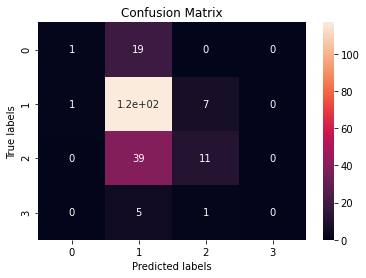

In [192]:
best = clf.best_estimator_
best.fit(X_train, y_train)
y_pred=best.predict(X_test)
preds_prob = best.predict_proba(X_test)
print(clf.best_score_)
print(metrics.classification_report(y_test, y_pred))
print('ROC AUC:',
     '\n    macro:', round(metrics.roc_auc_score(y_test, preds_prob, multi_class='ovr', average='macro'), 5),
     '\n    weighted:', round(metrics.roc_auc_score(y_test, preds_prob, multi_class='ovr', average='weighted'), 5))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

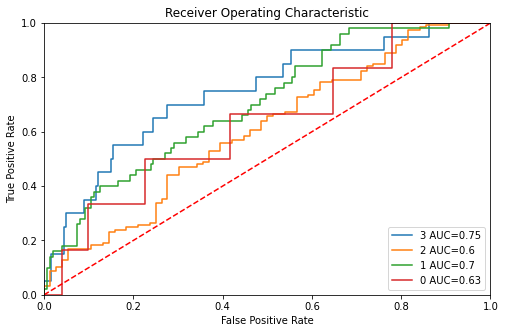

In [193]:
y_val_bin = label_binarize(y_test, classes=np.arange(y_train.nunique()))
plot_roc(y_val_bin, preds_prob, target_names=['3', '2', '1', '0'], figsize=(8,5))

Maximal score: 0.6354581673306773


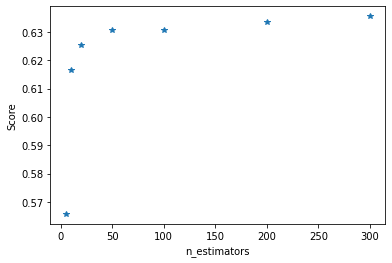

In [194]:
score = []

for n in n_estimators:
    rf = RandomForestClassifier(random_state=17, n_estimators=n, oob_score = True, max_depth=5).fit(X, y)
    score.append(rf.oob_score_)

plt.plot(n_estimators, score, "*")
plt.xlabel('n_estimators')
plt.ylabel('Score')

print(f'Maximal score: {max(score)}')

## GradientBoostingClassifier

[0.6318408  0.65174129 0.67164179 0.67164179 0.64      ]
----------------------Model performance-----------------------
Accuracy score:  0.582089552238806
ROC AUC: 
    macro: 0.67116 
    weighted: 0.64377
CV score: Mean - 0.6533731343283582, Max - 0.6716417910447762, Min - 0.6318407960199005, Std - 0.016202671727973683


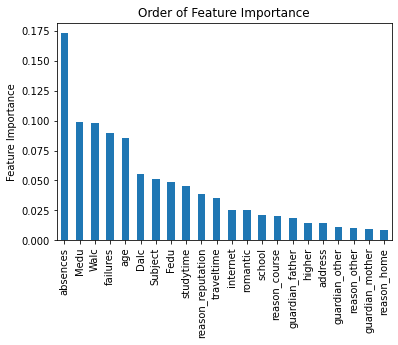

In [195]:
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
def GBC_model(clf):
    clf.fit(X_train, y_train)
    probab_of_predict = clf.predict_proba(X_test)
    predict_train = clf.predict(X_test)


    cv_score = cross_val_score(clf, X, y, cv = 5, scoring="accuracy")
    print(cv_score)

    print("----------------------Model performance-----------------------")
    print("Accuracy score: ", accuracy_score(y_test, predict_train))
    print('ROC AUC:',
     '\n    macro:', round(metrics.roc_auc_score(y_test, preds_prob, multi_class='ovr', average='macro'), 5),
     '\n    weighted:', round(metrics.roc_auc_score(y_test, preds_prob, multi_class='ovr', average='weighted'), 5))
    print("CV score: Mean - {}, Max - {}, Min - {}, Std - {}".format(np.mean(cv_score), np.max(cv_score),
                                                                     np.min(cv_score), np.std(cv_score)))

    Relative_Feature_importance = pd.Series(clf.feature_importances_, X.columns).sort_values(ascending=False)
    Relative_Feature_importance.plot(kind='bar', title='Order of Feature Importance')
    plt.ylabel('Feature Importance')
    plt.show()
clf = GradientBoostingClassifier(learning_rate =0.25,random_state=17)
GBC_model(clf)

## Let's start with tunning of the parameters.
1) Get the n_estimators. we use the Gvsearch for this.

In [196]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, 
                                    max_depth = 2, random_state=17)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.623
Accuracy score (validation): 0.622

Learning rate:  0.1
Accuracy score (training): 0.626
Accuracy score (validation): 0.637

Learning rate:  0.25
Accuracy score (training): 0.663
Accuracy score (validation): 0.642

Learning rate:  0.5
Accuracy score (training): 0.692
Accuracy score (validation): 0.577

Learning rate:  0.75
Accuracy score (training): 0.712
Accuracy score (validation): 0.562

Learning rate:  1
Accuracy score (training): 0.727
Accuracy score (validation): 0.562



In [197]:
estimators = [x for x in range(10,131,10)]
first_tune = {'n_estimators': estimators}
first_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate =0.25,random_state=17)
                   , param_grid=first_tune,scoring='accuracy', n_jobs=-1,  cv=5)

first_search.fit(X_train,y_train)

print(first_search.best_params_, first_search.best_score_)

{'n_estimators': 20} 0.658804347826087


In [198]:
min_split = [x for x in range(300,1101,100)]
depth = [x for x in range(5,15,1)]
second_tune = {'max_depth':depth, 'min_samples_split':min_split}
second_search = GridSearchCV(estimator=GradientBoostingClassifier(n_estimators = 10,learning_rate =0.25,random_state=17)
                   , param_grid=second_tune,scoring='accuracy', n_jobs=6,  cv=5)

second_search.fit(X_train,y_train)

print(second_search.best_params_, second_search.best_score_)

{'max_depth': 6, 'min_samples_split': 300} 0.6338431677018633


In [199]:
min_sample_leaf = [x for x in range(20,200,10)]
third_tune = {'min_samples_leaf':min_sample_leaf}
third_search = GridSearchCV(estimator=GradientBoostingClassifier(n_estimators = 10,min_samples_split=300,
                                                                 max_depth=6, learning_rate =0.25,random_state=17)
                   , param_grid=third_tune,scoring='accuracy', n_jobs=6,  cv=5)

third_search.fit(X,y)

print( third_search.best_params_, third_search.best_score_)

{'min_samples_leaf': 70} 0.6513980099502488


С помощью бустинга не  поднять показатели.

[0.63681592 0.63681592 0.66169154 0.66666667 0.655     ]
----------------------Model performance-----------------------
Accuracy score:  0.6169154228855721
ROC AUC: 
    macro: 0.67116 
    weighted: 0.64377
CV score: Mean - 0.6513980099502488, Max - 0.6666666666666666, Min - 0.6368159203980099, Std - 0.012468662235068735


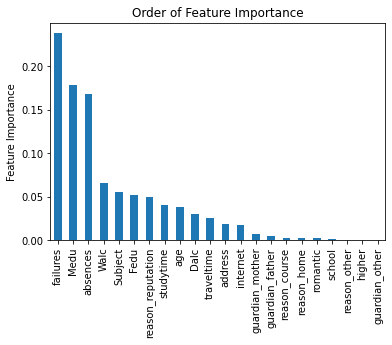

None


In [200]:
clf = GradientBoostingClassifier(n_estimators = 100,min_samples_split=300,
                                 max_depth=9, learning_rate =0.25,random_state=17,min_samples_leaf=120)


print(GBC_model(third_search.best_estimator_))

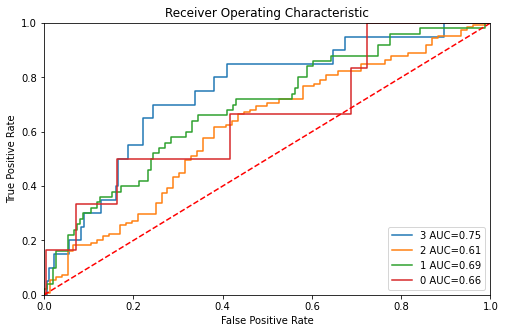

In [201]:

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
preds_prob = clf.predict_proba(X_test)
y_val_bin = label_binarize(y_test, classes=np.arange(y_train.nunique()))
plot_roc(y_val_bin, preds_prob, target_names=['3', '2', '1', '0'], figsize=(8,5))

Тем не менее бустинг показал лучшие результаты для roc кривой. Самыми важными оказались failures, medu и absences, что в реальной жизни действительно влияет на итоговую оценку. 